In [766]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('max_column', 100)

%matplotlib inline

In [767]:
mst_path = '../../datasets/mst/'
fig_path = '../../export/02_summary_stats_ped/'

In [768]:
df = pd.read_csv(mst_path + 'clean_ped.csv')
df.head()

,intervalid,location_id,street1,street2,street3,latitude,longitude,date,weekday,period_begin,period_end,interval_begin,ns,sn,ew,we,specialneeds,skate,child,count_method,raining,unusual,bikewaytype,bikewaytype_options,road_class,speed_limit,landuse,pk_dataset_id,city,createdatetime,total_count,female,cane,dog,on_street
0,17560.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,11:00 AM,0,0,4,7,0,1,2.0,manual_in_house,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,11,0.0,0.0,0.0,0.0
1,17561.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,11:15 AM,0,0,0,0,0,0,0.0,manual_in_house,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,0,0.0,0.0,0.0,0.0
2,17562.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,11:30 AM,0,0,2,5,0,0,0.0,manual_in_house,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,7,0.0,0.0,0.0,0.0
3,17563.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,11:45 AM,0,0,1,3,0,0,0.0,manual_in_house,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,4,0.0,0.0,0.0,0.0
4,17564.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,12:00 PM,0,0,1,0,0,0,0.0,manual_in_house,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,1,0.0,0.0,0.0,0.0


In [769]:
df.iloc[:, 28]

0       SEM
1       SEM
2       SEM
3       SEM
4       SEM
5       SEM
6       SEM
7       SEM
8       SEM
9       SEM
10      SEM
11      SEM
12      SEM
13      SEM
14      SEM
15      SEM
16      SEM
17      SEM
18      SEM
19      SEM
20      SEM
21      SEM
22      SEM
23      SEM
24      SEM
25      SEM
26      SEM
27      SEM
28      SEM
29      SEM
       ... 
2618    NaN
2619    NaN
2620    NaN
2621    NaN
2622    NaN
2623    NaN
2624    NaN
2625    NaN
2626    NaN
2627    NaN
2628    NaN
2629    NaN
2630    NaN
2631    NaN
2632    NaN
2633    NaN
2634    NaN
2635    NaN
2636    NaN
2637    NaN
2638    NaN
2639    NaN
2640    NaN
2641    NaN
2642    NaN
2643    NaN
2644    NaN
2645    NaN
2646    NaN
2647    NaN
Name: city, Length: 2648, dtype: object

# Identify problems with `date` and its distribution

Explore the data types of each column. Notice that the time column "date" is of type "object". Let's change that to datetime 

In [770]:
df['date'].dtype

dtype('O')

In [771]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes['date']

dtype('<M8[ns]')

In [772]:
# Observe that there are some nan values in the column date. We drop these rows
print("Number of nans in the date column:", df.isna().sum()['date'])
df = df.dropna(subset = ['date'])
df.index = range(len(df))
df.shape

Number of nans in the date column: 24


(2624, 35)

In [773]:
df.shape

(2624, 35)

In [774]:
# Explore the number of observations per year_month combinatino for the dataset
df['month'] = df['date'].apply(lambda x: x.month)
df['year'] = df['date'].apply(lambda x: int(x.year))
df['yr_mo'] = [str(a)+'-'+str(b) for a,b in zip(df['year'], df['month'])]
df['yr_mo'].value_counts()

2017-4     512
2017-6     280
2017-5     264
2016-4     240
2016-12    208
2016-5     208
2016-10    184
2017-1     144
2017-3     144
2017-2     128
2016-11    112
2016-9      56
2017-7      56
2018-1      32
2016-8      24
2018-7      24
2017-8       8
Name: yr_mo, dtype: int64

It seems that 2017-01 to 2017-06 has most of the data points, so we focus on this period only. Note that you can totally make other assumptions and subset the data in another way! This is just what I am doing here.

In [775]:
# Subset the data for only this time range:
time_range = ['2017-' + str(i) for i in range(1,7)]
print("time_range", time_range)

# Subset the data and check how many obs. are left
df = df[df['yr_mo'].isin(time_range)]
df.shape

time_range ['2017-1', '2017-2', '2017-3', '2017-4', '2017-5', '2017-6']


(1472, 38)

# Temporal Trend of Total Counts

In order to explore any trends, we need to aggregate the data somehow. For example, assume we want to group by `date` and find the `sum` and `mean` of the variable `total_count` on each day, we could use the `groupby` and `agg` functions to achieve this.

Also try play around with 
```
grouped = df.groupby('date').agg(['sum', 'mean']).reset_index()
grouped.head()
```

In [776]:
df.head()

,intervalid,location_id,street1,street2,street3,latitude,longitude,date,weekday,period_begin,period_end,interval_begin,ns,sn,ew,we,specialneeds,skate,child,count_method,raining,unusual,bikewaytype,bikewaytype_options,road_class,speed_limit,landuse,pk_dataset_id,city,createdatetime,total_count,female,cane,dog,on_street,month,year,yr_mo
32,16254.0,1030.0,Durfee Ave.,Thienes Ave.,Rush St.,34.043525,-118.032415,2017-01-17,Tuesday,4:00 PM,6:00 PM,4:00 PM,2,4,0,0,1,0,1.0,manual_in_house,no,none,none,none,principalArterial,35.0,neighborhoodRetail,133.0,SEM,2017-02-07 13:31:00,6,0.0,0.0,0.0,0.0,1,2017,2017-1
33,16255.0,1030.0,Durfee Ave.,Thienes Ave.,Rush St.,34.043525,-118.032415,2017-01-17,Tuesday,4:00 PM,6:00 PM,4:15 PM,2,3,0,0,0,2,2.0,manual_in_house,no,none,none,none,principalArterial,35.0,neighborhoodRetail,133.0,SEM,2017-02-07 13:31:00,5,0.0,0.0,0.0,0.0,1,2017,2017-1
34,16256.0,1030.0,Durfee Ave.,Thienes Ave.,Rush St.,34.043525,-118.032415,2017-01-17,Tuesday,4:00 PM,6:00 PM,4:30 PM,0,1,0,0,0,0,1.0,manual_in_house,no,none,none,none,principalArterial,35.0,neighborhoodRetail,133.0,SEM,2017-02-07 13:31:00,1,0.0,0.0,0.0,0.0,1,2017,2017-1
35,16257.0,1030.0,Durfee Ave.,Thienes Ave.,Rush St.,34.043525,-118.032415,2017-01-17,Tuesday,4:00 PM,6:00 PM,4:45 PM,1,0,0,0,0,0,0.0,manual_in_house,no,none,none,none,principalArterial,35.0,neighborhoodRetail,133.0,SEM,2017-02-07 13:31:00,1,0.0,0.0,0.0,0.0,1,2017,2017-1
36,16258.0,1030.0,Durfee Ave.,Thienes Ave.,Rush St.,34.043525,-118.032415,2017-01-17,Tuesday,4:00 PM,6:00 PM,5:00 PM,1,1,0,0,1,0,0.0,manual_in_house,no,none,none,none,principalArterial,35.0,neighborhoodRetail,133.0,SEM,2017-02-07 13:31:00,2,0.0,0.0,0.0,0.0,1,2017,2017-1


In [777]:
len(df['date'].unique())

51

In [778]:
grouped = df.groupby('date').agg(['sum', 'mean'])['total_count'].reset_index()
grouped.head()

,date,sum,mean
0,2017-01-10,16,1.0000
1,2017-01-15,53,3.3125
2,2017-01-17,51,3.1875
3,2017-01-24,161,10.0625
4,2017-01-26,90,11.2500


Let's try plotting the average total count per day. Note that this doesn't tell us anything useful, as we did not take into account the number of volunteers availabe!! Try deleting or adding back the last few functions (`plt.xticks`, `plt.xlabel`) and observe the difference. 

Text(0.5, 1.0, 'Average total_count by date')

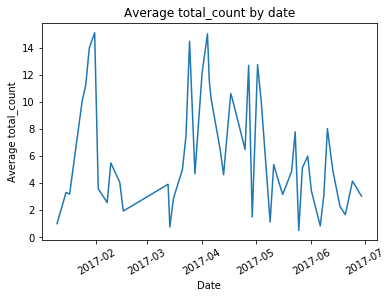

In [779]:
plt.plot(grouped['date'], grouped['mean'])
plt.xticks(rotation = 30)
plt.xlabel('Date')
plt.ylabel('Average total_count')
plt.title("Average total_count by date")

Assume we only want to look at two cities, we could subset the datasets and do the same thing as above. Note that the below commands examines the two cities with most number of observations.

In [780]:
# Find which ciplt.xticks(rotation = 30)
# plt.xlabel('Date') ties has most number of observations
cities = df['city'].value_counts().sort_values(ascending = False)
cities.head()

Duarte                     168
Altadena                   144
Mt. SAC/Cal Poly/Walnut    128
Pomona                     104
Arcadia                     96
Name: city, dtype: int64

In [781]:
# Extract the two top cities:
top_cities = cities.index[:5]
top_cities

Index(['Duarte', 'Altadena', 'Mt. SAC/Cal Poly/Walnut', 'Pomona', 'Arcadia'], dtype='object')

In [782]:
# We will proceed with Glendora and SEM
dua = df[df['city'] == 'Duarte']
alt = df[df['city'] == 'Altadena']
mts = df[df['city'] == 'Mt. SAC/Cal Poly/Walnut']
pom = df[df['city'] == 'Pomona']
arc = df[df['city'] == 'Arcadia']
print(dua.shape)
print(alt.shape)
print(mts.shape)
print(pom.shape)
print(arc.shape)

(168, 38)
(144, 38)
(128, 38)
(104, 38)
(96, 38)


In [783]:
# Perform the same groupby commands
dua_group = dua.groupby('date').agg(['sum', 'mean'])['total_count'].reset_index()
alt_group = alt.groupby('date').agg(['sum', 'mean'])['total_count'].reset_index()
mts_group = dua.groupby('date').agg(['sum', 'mean'])['total_count'].reset_index()
pom_group = pom.groupby('date').agg(['sum', 'mean'])['total_count'].reset_index()
arc_group = arc.groupby('date').agg(['sum', 'mean'])['total_count'].reset_index()
dua_group
alt_group
mts_group
pom_group
arc_group


,date,sum,mean
0,2017-04-01,870,36.2500
1,2017-04-05,93,11.6250
2,2017-04-17,85,10.6250
3,2017-05-02,119,7.4375
4,2017-05-04,212,26.5000
5,2017-05-11,107,6.6875
6,2017-05-23,140,8.7500


Text(0.5, 1.0, 'Average total_count by date')

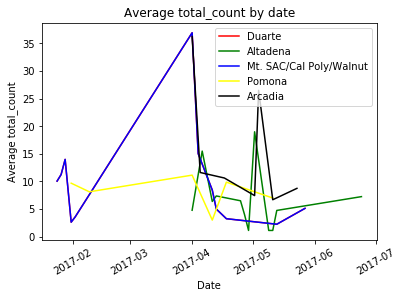

In [784]:
plt.plot(dua_group['date'], dua_group['mean'], color = 'red', label = 'Duarte')
plt.plot(alt_group['date'], alt_group['mean'], color = 'green', label = 'Altadena')
plt.plot(mts_group['date'], mts_group['mean'], color = 'blue', label = 'Mt. SAC/Cal Poly/Walnut')
plt.plot(pom_group['date'], pom_group['mean'], color = 'yellow', label = 'Pomona')
plt.plot(arc_group['date'], arc_group['mean'], color = 'black', label = 'Arcadia')
plt.xticks(rotation = 30)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Average total_count')
plt.title("Average total_count by date")

Gotta say this looks pretty bad... Now try select cities with most number of dates

In [785]:
city_ndate = df.groupby('city')['date'].nunique().sort_values(ascending = False)
city_ndate.head()

city
Altadena                   12
Duarte                     12
Mt. SAC/Cal Poly/Walnut     8
E. Pasadena                 7
Rowland Heights             7
Name: date, dtype: int64

Now you could perform the same analysis as above on these cities. I will not repeat that again.

# Temporal Trends of One Variable: Percentage of Female riders

In [786]:
# Create two time series - female and total
female = df.groupby('date').agg(['sum'])['female'].reset_index()
total = df.groupby('date').agg(['sum'])['total_count'].reset_index()
print(female.shape)
print(total.shape)

female.head()

(51, 2)
(51, 2)


,date,sum
0,2017-01-10,0.0
1,2017-01-15,0.0
2,2017-01-17,0.0
3,2017-01-24,0.0
4,2017-01-26,0.0


In [787]:
# We change the columns and merge these two datasets together
female.columns = ['date', 'female']
total.columns = ['date', 'total_count']
female.head()

,date,female
0,2017-01-10,0.0
1,2017-01-15,0.0
2,2017-01-17,0.0
3,2017-01-24,0.0
4,2017-01-26,0.0


In [788]:
merged = pd.merge(female, total, on = 'date', how = 'inner')
merged.shape

(51, 3)

In [789]:
merged.head()

,date,female,total_count
0,2017-01-10,0.0,16
1,2017-01-15,0.0,53
2,2017-01-17,0.0,51
3,2017-01-24,0.0,161
4,2017-01-26,0.0,90


In [790]:
# Explore female percentage changes - create a new column called female_perc
merged['female_perc'] = merged['female'] / merged['total_count']
merged.head()

,date,female,total_count,female_perc
0,2017-01-10,0.0,16,0.0
1,2017-01-15,0.0,53,0.0
2,2017-01-17,0.0,51,0.0
3,2017-01-24,0.0,161,0.0
4,2017-01-26,0.0,90,0.0


Text(0, 0.5, 'Female Percentage')

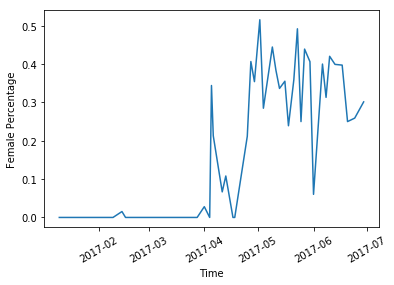

In [791]:
# Naive time plot 
plt.plot(merged['date'], merged['female_perc'])
plt.xticks(rotation = 30)
plt.xlabel('Time')
plt.ylabel('Female Percentage')

## Notice that the curve remained 0 for a long time, this is probably that the female data is not collected on this time period.

# Temporal Trends of One Variable: Day of Week

In [792]:
day_of_week = df.groupby('weekday').agg(['sum'])['total_count'].reset_index()
print(day_of_week.shape)
print(total.shape)

day_of_week.head()

(6, 2)
(51, 2)


,weekday,sum
0,Monday,179
1,Saturday,3911
2,Sunday,53
3,Thursday,2489
4,Tuesday,4037


In [793]:
day_of_week.columns = ['weekday', 'total_count']
day_of_week.head()

,weekday,total_count
0,Monday,179
1,Saturday,3911
2,Sunday,53
3,Thursday,2489
4,Tuesday,4037


In [794]:
total_riders = day_of_week['total_count'].sum()
total_riders

10762

In [795]:
day_of_week = day_of_week.reindex(columns=['weekday', 'total_count', 'weekday_perc'])
day_of_week[['weekday_perc']] = day_of_week['total_count'] / total_riders
day_of_week

,weekday,total_count,weekday_perc
0,Monday,179,0.016633
1,Saturday,3911,0.363408
2,Sunday,53,0.004925
3,Thursday,2489,0.231277
4,Tuesday,4037,0.375116
5,Wednesday,93,0.008642


Text(0, 0.5, 'Weekday Percentage')

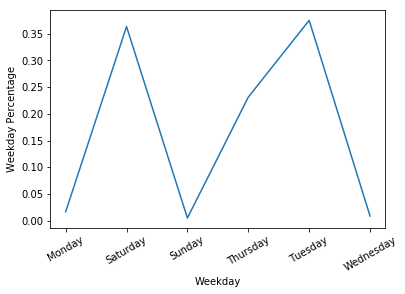

In [796]:
# Naive time plot 
plt.plot(day_of_week['weekday'], day_of_week['weekday_perc'])
plt.xticks(rotation = 30)
plt.xlabel('Weekday')
plt.ylabel('Weekday Percentage')

# Ratio Comparison of Pedestrians and Bikers

In [797]:
bike_ds_path = "../../datasets/mst/clean_bike.csv"
ped_ds_path = "../../datasets/mst/clean_ped.csv"

In [798]:
bike_df = pd.read_csv(bike_ds_path)
ped_df = pd.read_csv(ped_ds_path)

In [799]:
ped_df.head()

,intervalid,location_id,street1,street2,street3,latitude,longitude,date,weekday,period_begin,period_end,interval_begin,ns,sn,ew,we,specialneeds,skate,child,count_method,raining,unusual,bikewaytype,bikewaytype_options,road_class,speed_limit,landuse,pk_dataset_id,city,createdatetime,total_count,female,cane,dog,on_street
0,17560.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,11:00 AM,0,0,4,7,0,1,2.0,manual_in_house,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,11,0.0,0.0,0.0,0.0
1,17561.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,11:15 AM,0,0,0,0,0,0,0.0,manual_in_house,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,0,0.0,0.0,0.0,0.0
2,17562.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,11:30 AM,0,0,2,5,0,0,0.0,manual_in_house,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,7,0.0,0.0,0.0,0.0
3,17563.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,11:45 AM,0,0,1,3,0,0,0.0,manual_in_house,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,4,0.0,0.0,0.0,0.0
4,17564.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,12:00 PM,0,0,1,0,0,0,0.0,manual_in_house,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,1,0.0,0.0,0.0,0.0


In [800]:
bike_df.head()

,intervalid,location_id,street1,street2,street3,latitude,longitude,date,weekday,period_begin,period_end,interval_begin,ns,sn,ew,we,female,sidewalk,wrongway,count_method,count_bikesonsidewalks,raining,unusual,bikewaytype,bikewaytype_options,road_class,speed_limit,landuse,pk_dataset_id,city,createdatetime,total_count,no_helmet,child
0,19203.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,11:00 AM,0,0,0,1,0,0,1.0,manual_in_house,1,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,1,1,0
1,19204.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,11:15 AM,0,0,1,0,0,0,0.0,manual_in_house,1,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,1,0,0
2,19205.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,11:30 AM,0,0,1,0,0,0,0.0,manual_in_house,1,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,1,0,0
3,19206.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,11:45 AM,0,0,2,0,0,0,0.0,manual_in_house,1,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,2,0,0
4,19207.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,12:00 PM,0,0,0,0,0,0,0.0,manual_in_house,1,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,0,0,0


In [801]:
bike_df.loc[(bike_df['street1'] == 'Workman Mill Road') & (bike_df['street2'] == 'Peck Rd.') & (bike_df['street3'] == 'College Dr'), 'location_id'] = 1824
ped_df.loc[(ped_df['street1'] == 'Workman Mill Road') & (ped_df['street2'] == 'Peck Rd.') & (ped_df['street3'] == 'College Dr'), 'location_id'] = 1824


bike_df.loc[(bike_df['street1'] == 'Barranca Ave') & (bike_df['street2'] == 'Badillo St') & (bike_df['street3'] == 'E Algrove St'), 'location_id'] = 1924
ped_df.loc[(ped_df['street1'] == 'Barranca Ave') & (ped_df['street2'] == 'Badillo St') & (ped_df['street3'] == 'E Algrove St'), 'location_id'] = 1924

In [802]:
ped_filtered = ped_df[['date', 'location_id', 'interval_begin', 'total_count']]
bike_filtered = bike_df[['date', 'location_id', 'interval_begin', 'total_count']]
ped_filtered.head()
bike_filtered.head()

,date,location_id,interval_begin,total_count
0,12-03-2016,1025.0,11:00 AM,1
1,12-03-2016,1025.0,11:15 AM,1
2,12-03-2016,1025.0,11:30 AM,1
3,12-03-2016,1025.0,11:45 AM,2
4,12-03-2016,1025.0,12:00 PM,0


In [803]:
bike_filtered.head()

,date,location_id,interval_begin,total_count
0,12-03-2016,1025.0,11:00 AM,1
1,12-03-2016,1025.0,11:15 AM,1
2,12-03-2016,1025.0,11:30 AM,1
3,12-03-2016,1025.0,11:45 AM,2
4,12-03-2016,1025.0,12:00 PM,0


In [804]:
# merge the bike and ped dataframes together with inner join
merged = bike_filtered.merge(ped_filtered, how='inner', on=['date', 'location_id', 'interval_begin'])

# rename columns
merged = merged.rename(mapper={'total_count_x': 'bike_count', 'total_count_y': 'ped_count'}, axis=1)

# add totals, percentage columns
merged['total'] = merged['bike_count'] + merged['ped_count']
merged.head()

,date,location_id,interval_begin,bike_count,ped_count,total
0,12-03-2016,1025.0,11:00 AM,1,11,12
1,12-03-2016,1025.0,11:15 AM,1,0,1
2,12-03-2016,1025.0,11:30 AM,1,7,8
3,12-03-2016,1025.0,11:45 AM,2,4,6
4,12-03-2016,1025.0,12:00 PM,0,1,1


In [805]:
# Use the date and interval_begin column to make a datetime column
merged['date'] = pd.to_datetime(merged['date'])
merged.head()

,date,location_id,interval_begin,bike_count,ped_count,total
0,2016-12-03,1025.0,11:00 AM,1,11,12
1,2016-12-03,1025.0,11:15 AM,1,0,1
2,2016-12-03,1025.0,11:30 AM,1,7,8
3,2016-12-03,1025.0,11:45 AM,2,4,6
4,2016-12-03,1025.0,12:00 PM,0,1,1


In [806]:
# merge on location id and date (we don't need it)
merged_on_day = merged.groupby(by='date').mean()
merged_on_day = merged_on_day.drop('location_id', axis=1)
merged_on_day.head()

,bike_count,ped_count,total
date,,,
2016-04-14,1.000000,10.375000,11.375000
2016-04-16,3.956522,3.652174,7.608696
2016-04-19,1.612903,5.290323,6.903226
2016-04-21,1.208333,3.604167,4.812500
2016-04-23,1.875000,6.200000,8.075000


In [807]:
# adding percentages
merged_on_day['bike_percent'] = merged_on_day['bike_count'] / merged_on_day['total'] 
merged_on_day['ped_percent'] = merged_on_day['ped_count'] / merged_on_day['total']
merged_on_day.head()

,bike_count,ped_count,total,bike_percent,ped_percent
date,,,,,
2016-04-14,1.000000,10.375000,11.375000,0.087912,0.912088
2016-04-16,3.956522,3.652174,7.608696,0.520000,0.480000
2016-04-19,1.612903,5.290323,6.903226,0.233645,0.766355
2016-04-21,1.208333,3.604167,4.812500,0.251082,0.748918
2016-04-23,1.875000,6.200000,8.075000,0.232198,0.767802


In [808]:
merged_on_day[merged_on_day["ped_count"] > 500]

,bike_count,ped_count,total,bike_percent,ped_percent
date,,,,,


# Visualizations

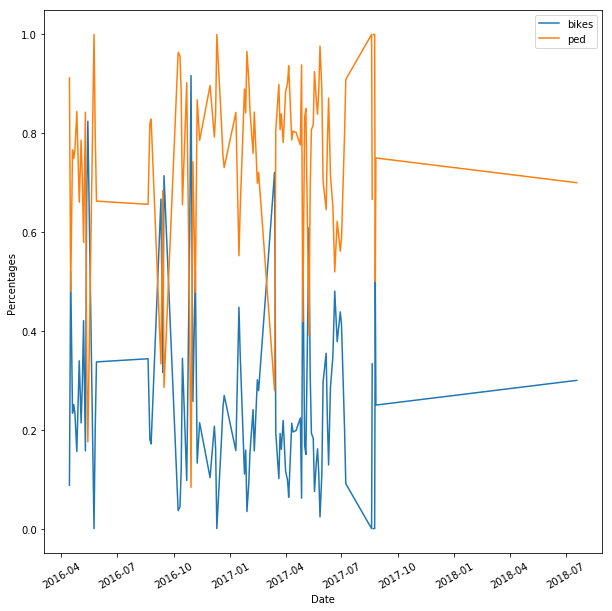

In [809]:
plt.figure(figsize=(10, 10))

plt.plot(merged_on_day['bike_percent'], label='bikes')
plt.plot(merged_on_day['ped_percent'], label='ped')

plt.xlabel('Date')
plt.ylabel('Percentages')

plt.xticks(rotation = 30)

plt.legend()
plt.show()

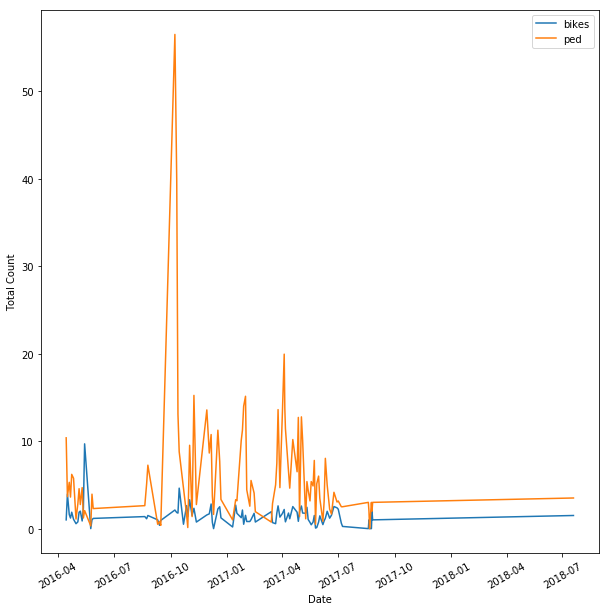

In [810]:
plt.figure(figsize=(10, 10))

plt.plot(merged_on_day['bike_count'], label='bikes')
plt.plot(merged_on_day['ped_count'], label='ped')

plt.xticks(rotation = 30)
plt.xlabel('Date')
plt.ylabel('Total Count')

plt.legend()
plt.show()

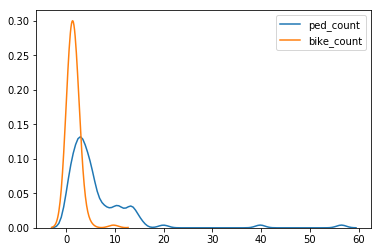

In [811]:
sns.kdeplot(merged_on_day['ped_count'], bw=1, cumulative=False)
sns.kdeplot(merged_on_day['bike_count'], bw=1, cumulative=False)

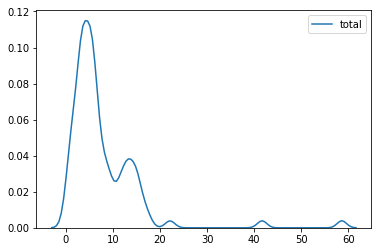

In [812]:
sns.kdeplot(merged_on_day['total'], bw=1, cumulative=False)

In [813]:
# bike ratio, bike + ped / bike

In [814]:
# deadline is new years
# bar graph for major cities, y axis is bike ratio

In [815]:
bike_ds_path = "../../datasets/mst/clean_bike.csv"
ped_ds_path = "../../datasets/mst/clean_ped.csv"

In [816]:
bike_df = pd.read_csv(bike_ds_path)
ped_df = pd.read_csv(ped_ds_path)

In [817]:
ped_df.head()

,intervalid,location_id,street1,street2,street3,latitude,longitude,date,weekday,period_begin,period_end,interval_begin,ns,sn,ew,we,specialneeds,skate,child,count_method,raining,unusual,bikewaytype,bikewaytype_options,road_class,speed_limit,landuse,pk_dataset_id,city,createdatetime,total_count,female,cane,dog,on_street
0,17560.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,11:00 AM,0,0,4,7,0,1,2.0,manual_in_house,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,11,0.0,0.0,0.0,0.0
1,17561.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,11:15 AM,0,0,0,0,0,0,0.0,manual_in_house,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,0,0.0,0.0,0.0,0.0
2,17562.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,11:30 AM,0,0,2,5,0,0,0.0,manual_in_house,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,7,0.0,0.0,0.0,0.0
3,17563.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,11:45 AM,0,0,1,3,0,0,0.0,manual_in_house,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,4,0.0,0.0,0.0,0.0
4,17564.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,12:00 PM,0,0,1,0,0,0,0.0,manual_in_house,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,1,0.0,0.0,0.0,0.0


In [818]:
bike_df.head()

,intervalid,location_id,street1,street2,street3,latitude,longitude,date,weekday,period_begin,period_end,interval_begin,ns,sn,ew,we,female,sidewalk,wrongway,count_method,count_bikesonsidewalks,raining,unusual,bikewaytype,bikewaytype_options,road_class,speed_limit,landuse,pk_dataset_id,city,createdatetime,total_count,no_helmet,child
0,19203.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,11:00 AM,0,0,0,1,0,0,1.0,manual_in_house,1,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,1,1,0
1,19204.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,11:15 AM,0,0,1,0,0,0,0.0,manual_in_house,1,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,1,0,0
2,19205.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,11:30 AM,0,0,1,0,0,0,0.0,manual_in_house,1,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,1,0,0
3,19206.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,11:45 AM,0,0,2,0,0,0,0.0,manual_in_house,1,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,2,0,0
4,19207.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,12:00 PM,0,0,0,0,0,0,0.0,manual_in_house,1,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,0,0,0


In [819]:
ped_filtered = ped_df[['date', 'city', 'interval_begin', 'total_count']]
bike_filtered = bike_df[['date', 'city', 'interval_begin', 'total_count']]
ped_filtered.head()

,date,city,interval_begin,total_count
0,12-03-2016,SEM,11:00 AM,11
1,12-03-2016,SEM,11:15 AM,0
2,12-03-2016,SEM,11:30 AM,7
3,12-03-2016,SEM,11:45 AM,4
4,12-03-2016,SEM,12:00 PM,1


In [820]:
# bike_filtered = bike_filtered[bike_filtered['city'].isin(['Duarte', 'Altadena', 'Mt. SAC/Cal Poly/Walnut', 'Pomona', 'Arcadia', 'SEM', 'Glendora', 'El Monte', 'West Covina', 'Pasadena', 'La Verne', 'Irwindale', 'La Puente', 'Rowland Heights', 'Claremont', 'Covina', 'Temple City', 'Monterey Park'])]
# ped_filtrered = ped_filtered[ped_filtered['city'].isin(['Duarte', 'Altadena', 'Mt. SAC/Cal Poly/Walnut', 'Pomona', 'Arcadia', 'SEM', 'Glendora', 'El Monte', 'West Covina', 'Pasadena', 'La Verne', 'Irwindale', 'La Puente', 'Rowland Heights', 'Claremont', 'Covina', 'Temple City', 'Monterey Park'])]
# bike_filtered.head()

In [821]:
ped_filtrered.head()

,date,city,interval_begin,total_count
0,12-03-2016,SEM,11:00 AM,11
1,12-03-2016,SEM,11:15 AM,0
2,12-03-2016,SEM,11:30 AM,7
3,12-03-2016,SEM,11:45 AM,4
4,12-03-2016,SEM,12:00 PM,1


In [822]:
# merge the bike and ped dataframes together with inner join
merged = bike_filtered.merge(ped_filtered, how='inner', on=['date', 'city', 'interval_begin'])

# rename columns
merged = merged.rename(mapper={'total_count_x': 'bike_count', 'total_count_y': 'ped_count'}, axis=1)

# add totals, percentage columns
merged['total'] = merged['bike_count'] + merged['ped_count']

# Use the date and interval_begin column to make a datetime column
merged['date'] = pd.to_datetime(merged['date'])

merged.head()

,date,city,interval_begin,bike_count,ped_count,total
0,2016-12-03,SEM,11:00 AM,1,11,12
1,2016-12-03,SEM,11:00 AM,1,7,8
2,2016-12-03,SEM,11:00 AM,1,4,5
3,2016-12-03,SEM,11:00 AM,1,16,17
4,2016-12-03,SEM,11:00 AM,1,0,1


In [881]:
# merge on location id and date (we don't need it)
merged_on_day_avg = merged.groupby(by=['city','date']).mean()
#merged_on_day = merged_on_day.drop('city', axis=1)
merged_on_day_avg

bike_count  ped_count      total
city            date                                        
Altadena        2017-04-01    0.852941   6.264706   7.117647
                2017-04-06    0.562500  15.812500  16.375000
                2017-04-11    0.125000   6.375000   6.500000
                2017-04-13    0.875000   7.375000   8.250000
                2017-04-25    1.875000   6.500000   8.375000
                2017-04-27    0.500000   4.000000   4.500000
                2017-04-29    2.250000   1.125000   3.375000
                2017-05-02    1.812500  19.000000  20.812500
                2017-05-09    1.750000   1.125000   2.875000
                2017-05-11    5.125000   1.125000   6.250000
                2017-05-13    1.600000   4.600000   6.200000
                2017-06-24    3.875000   7.250000  11.125000
Arcadia         2017-04-01    3.800000  44.000000  47.800000
                2017-04-05    1.250000  13.750000  15.000000
                2017-05-02    2.125000   7.437500   9.562500
                2017-05-04    1.625000  26.500000  28.125000
                2017-05-11    1.125000   6.687500   7.812500
                2017-05-23    1.625000   8.750000  10.375000
Azusa           2016-04-30    1.250000   1.250000   2.500000
                2016-05-03    1.250000   4.687500   5.937500
                2016-05-05    1.875000   4.562500   6.437500
                2016-05-07    2.000000   2.750000   4.750000
                2017-04-01    3.375000  35.062500  38.437500
                2017-05-02    3.812500  11.875000  15.687500
                2017-05-30    0.750000   6.000000   6.750000
                2017-07-01    1.625000   8.125000   9.750000
Baldwin Park    2016-05-26    1.000000   3.937500   4.937500
                2017-03-16    0.812500   5.500000   6.312500
                2017-03-23    1.312500   1.187500   2.500000
                2017-04-01    1.500000   3.800000   5.300000
...                                ...        ...        ...
Rowland Heights 2017-05-21    0.750000   4.875000   5.625000
                2017-06-01    0.625000   1.500000   2.125000
                2017-06-08    1.187500   4.125000   5.312500
                2017-06-10    1.937500  13.562500  15.500000
                2017-06-13    2.062500   7.562500   9.625000
                2017-07-08    0.375000   4.875000   5.250000
S. Pasadena     2017-04-27    1.000000  17.062500  18.062500
                2017-04-29    0.875000   1.125000   2.000000
SEM             2016-12-03    1.075676   4.432432   5.508108
                2016-12-08    0.500000   2.843750   3.343750
                2016-12-10    0.000000   1.625000   1.625000
                2016-12-17    2.250000  11.250000  13.500000
                2016-12-20    2.750000   8.750000  11.500000
                2016-12-22    1.229167   3.333333   4.562500
                2017-01-10    0.187500   1.000000   1.187500
                2017-01-15    2.687500   3.312500   6.000000
                2017-01-17    1.750000   3.187500   4.937500
                2017-04-01    5.000000   5.800000  10.800000
                2018-07-19    3.000000   1.000000   4.000000
Temple City     2017-03-23    2.250000  13.750000  16.000000
                2017-03-25    2.600000  13.600000  16.200000
                2017-04-01    2.125000   4.375000   6.500000
                2017-04-18    2.437500   8.750000  11.187500
                2017-06-01    1.875000   4.437500   6.312500
West Covina     2016-04-26    1.437500   9.500000  10.937500
                2016-05-10    0.875000   4.687500   5.562500
                2016-05-12    0.187500   1.125000   1.312500
                2016-05-14    1.625000   3.875000   5.500000
                2016-05-28    0.937500   2.562500   3.500000
                2017-04-01    1.125000   2.375000   3.500000

[160 rows x 3 columns]

In [889]:
merged_on_day_avg = merged.groupby(by=['city','date']).mean()
merged_on_day_avg['ped_ratio'] = merged_on_day_avg['ped_count'] / merged_on_day_avg['total']
merged_on_day_avg['bike_ratio'] = merged_on_day_avg['bike_count'] / merged_on_day_avg['total'] 
merged_on_day_avg


bike_count  ped_count      total  ped_ratio  \
city            date                                                      
Altadena        2017-04-01    0.852941   6.264706   7.117647   0.880165   
                2017-04-06    0.562500  15.812500  16.375000   0.965649   
                2017-04-11    0.125000   6.375000   6.500000   0.980769   
                2017-04-13    0.875000   7.375000   8.250000   0.893939   
                2017-04-25    1.875000   6.500000   8.375000   0.776119   
                2017-04-27    0.500000   4.000000   4.500000   0.888889   
                2017-04-29    2.250000   1.125000   3.375000   0.333333   
                2017-05-02    1.812500  19.000000  20.812500   0.912913   
                2017-05-09    1.750000   1.125000   2.875000   0.391304   
                2017-05-11    5.125000   1.125000   6.250000   0.180000   
                2017-05-13    1.600000   4.600000   6.200000   0.741935   
                2017-06-24    3.875000   7.250000  11.125000   0.651685   
Arcadia         2017-04-01    3.800000  44.000000  47.800000   0.920502   
                2017-04-05    1.250000  13.750000  15.000000   0.916667   
                2017-05-02    2.125000   7.437500   9.562500   0.777778   
                2017-05-04    1.625000  26.500000  28.125000   0.942222   
                2017-05-11    1.125000   6.687500   7.812500   0.856000   
                2017-05-23    1.625000   8.750000  10.375000   0.843373   
Azusa           2016-04-30    1.250000   1.250000   2.500000   0.500000   
                2016-05-03    1.250000   4.687500   5.937500   0.789474   
                2016-05-05    1.875000   4.562500   6.437500   0.708738   
                2016-05-07    2.000000   2.750000   4.750000   0.578947   
                2017-04-01    3.375000  35.062500  38.437500   0.912195   
                2017-05-02    3.812500  11.875000  15.687500   0.756972   
                2017-05-30    0.750000   6.000000   6.750000   0.888889   
                2017-07-01    1.625000   8.125000   9.750000   0.833333   
Baldwin Park    2016-05-26    1.000000   3.937500   4.937500   0.797468   
                2017-03-16    0.812500   5.500000   6.312500   0.871287   
                2017-03-23    1.312500   1.187500   2.500000   0.475000   
                2017-04-01    1.500000   3.800000   5.300000   0.716981   
...                                ...        ...        ...        ...   
Rowland Heights 2017-05-21    0.750000   4.875000   5.625000   0.866667   
                2017-06-01    0.625000   1.500000   2.125000   0.705882   
                2017-06-08    1.187500   4.125000   5.312500   0.776471   
                2017-06-10    1.937500  13.562500  15.500000   0.875000   
                2017-06-13    2.062500   7.562500   9.625000   0.785714   
                2017-07-08    0.375000   4.875000   5.250000   0.928571   
S. Pasadena     2017-04-27    1.000000  17.062500  18.062500   0.944637   
                2017-04-29    0.875000   1.125000   2.000000   0.562500   
SEM             2016-12-03    1.075676   4.432432   5.508108   0.804711   
                2016-12-08    0.500000   2.843750   3.343750   0.850467   
                2016-12-10    0.000000   1.625000   1.625000   1.000000   
                2016-12-17    2.250000  11.250000  13.500000   0.833333   
                2016-12-20    2.750000   8.750000  11.500000   0.760870   
                2016-12-22    1.229167   3.333333   4.562500   0.730594   
                2017-01-10    0.187500   1.000000   1.187500   0.842105   
                2017-01-15    2.687500   3.312500   6.000000   0.552083   
                2017-01-17    1.750000   3.187500   4.937500   0.645570   
                2017-04-01    5.000000   5.800000  10.800000   0.537037   
                2018-07-19    3.000000   1.000000   4.000000   0.250000   
Temple City     2017-03-23    2.250000  13.750000  16.000000   0.859375   
                2017-03-25    2.600000  13.600000  16

In [826]:
merged_on_day_abs['ped_ratio'] = merged_on_day_avg['ped_count'] / merged_on_day_avg['total']
merged_on_day_abs['bike_ratio'] = merged_on_day_avg['bike_count'] / merged_on_day_avg['total']  
merged_on_day_abs.head()

bike_count  ped_count  total  ped_percent  bike_percent  \
city     date                                                                  
Altadena 2017-04-01          29        213    242     0.880165      0.119835   
         2017-04-06          18        506    524     0.965649      0.034351   
         2017-04-11           1         51     52     0.980769      0.019231   
         2017-04-13           7         59     66     0.893939      0.106061   
         2017-04-25          15         52     67     0.776119      0.223881   

                     bike_ratio  
city     date                    
Altadena 2017-04-01    8.344828  
         2017-04-06   29.111111  
         2017-04-11   52.000000  
         2017-04-13    9.428571  
         2017-04-25    4.466667

# Pomona

In [827]:
merged_on_day_abs.loc['Pomona']

data = merged_on_day_abs.loc[]
	data_total = data['total']
	for row in range(len(data_total)):
		if data_total[row] < 5:
			temp = temp.drop(temp.index[[row]])

,bike_count,ped_count,total,ped_percent,bike_percent,bike_ratio
date,,,,,,
2016-08-20,11,21,32,0.656250,0.343750,2.909091
2016-08-23,9,41,50,0.820000,0.180000,5.555556
2016-08-25,12,58,70,0.828571,0.171429,5.833333
2017-01-31,48,155,203,0.763547,0.236453,4.229167
2017-02-09,62,260,322,0.807453,0.192547,5.193548
2017-04-01,383,1450,1833,0.791053,0.208947,4.785901
2017-04-11,24,24,48,0.500000,0.500000,2.000000
2017-04-18,19,79,98,0.806122,0.193878,5.157895
2017-05-11,19,56,75,0.746667,0.253333,3.947368


In [828]:
# remove data with 'total' less 50
po = merged_on_day_avg.loc[['Pomona']]
po.index = po.index.droplevel(0)
po = po.drop(po.index[[0, 6]])

po

,bike_count,ped_count,total,ped_ratio,bike_ratio
date,,,,,
2016-08-23,1.125000,5.125000,6.250000,0.820000,0.180000
2016-08-25,1.500000,7.250000,8.750000,0.828571,0.171429
2017-01-31,3.000000,9.687500,12.687500,0.763547,0.236453
2017-02-09,1.937500,8.125000,10.062500,0.807453,0.192547
2017-04-01,2.659722,10.069444,12.729167,0.791053,0.208947
2017-04-18,2.375000,9.875000,12.250000,0.806122,0.193878
2017-05-11,2.375000,7.000000,9.375000,0.746667,0.253333


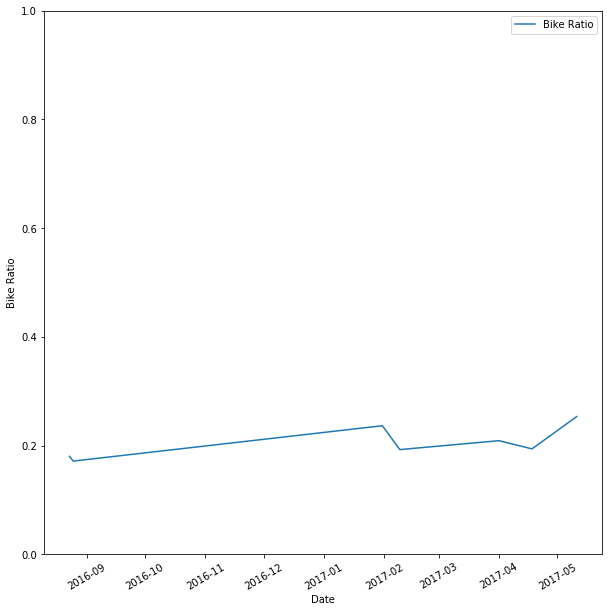

In [892]:
plt.figure(figsize=(10, 10))

plt.plot(po['bike_ratio'], label='Bike Ratio')

plt.xticks(rotation = 30)
plt.xlabel('Date')
plt.ylabel('Bike Ratio')

plt.ylim(0, 1)

plt.legend()
plt.show()



# Altadena

In [830]:
merged_on_day_abs.loc['Altadena']

,bike_count,ped_count,total,ped_percent,bike_percent,bike_ratio
date,,,,,,
2017-04-01,29,213,242,0.880165,0.119835,8.344828
2017-04-06,18,506,524,0.965649,0.034351,29.111111
2017-04-11,1,51,52,0.980769,0.019231,52.000000
2017-04-13,7,59,66,0.893939,0.106061,9.428571
2017-04-25,15,52,67,0.776119,0.223881,4.466667
2017-04-27,4,32,36,0.888889,0.111111,9.000000
2017-04-29,18,9,27,0.333333,0.666667,1.500000
2017-05-02,29,304,333,0.912913,0.087087,11.482759
2017-05-09,14,9,23,0.391304,0.608696,1.642857


In [831]:
# remove data with 'total' less than 50
alt = merged_on_day_avg.loc[['Altadena']]
alt.index = alt.index.droplevel(0)
alt = alt.drop(alt.index[[5, 6, 8, 10]])
alt

,bike_count,ped_count,total,ped_ratio,bike_ratio
date,,,,,
2017-04-01,0.852941,6.264706,7.117647,0.880165,0.119835
2017-04-06,0.562500,15.812500,16.375000,0.965649,0.034351
2017-04-11,0.125000,6.375000,6.500000,0.980769,0.019231
2017-04-13,0.875000,7.375000,8.250000,0.893939,0.106061
2017-04-25,1.875000,6.500000,8.375000,0.776119,0.223881
2017-05-02,1.812500,19.000000,20.812500,0.912913,0.087087
2017-05-11,5.125000,1.125000,6.250000,0.180000,0.820000
2017-06-24,3.875000,7.250000,11.125000,0.651685,0.348315


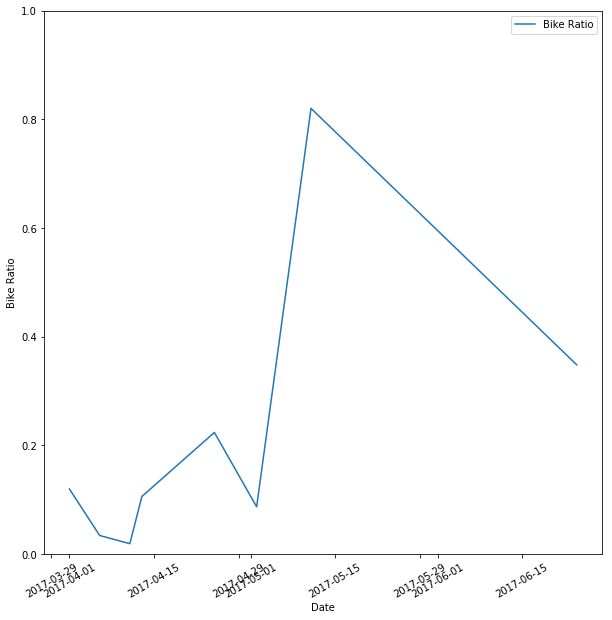

In [832]:
plt.figure(figsize=(10, 10))

plt.plot(alt['bike_ratio'], label='Bike Ratio')

plt.xticks(rotation = 30)
plt.xlabel('Date')
plt.ylabel('Bike Ratio')
plt.ylim(0, 1)

plt.legend()
plt.show()

# Mt SAC

In [833]:
merged_on_day_abs.loc['Mt. SAC/Cal Poly/Walnut']

,bike_count,ped_count,total,ped_percent,bike_percent,bike_ratio
date,,,,,,
2017-04-01,110,100,210,0.476190,0.523810,1.909091
2017-04-13,15,9,24,0.375000,0.625000,1.600000
2017-05-04,36,86,122,0.704918,0.295082,3.388889
2017-05-16,4,26,30,0.866667,0.133333,7.500000
2017-05-18,9,92,101,0.910891,0.089109,11.222222
2017-05-25,1,8,9,0.888889,0.111111,9.000000
2017-06-06,3,7,10,0.700000,0.300000,3.333333
2017-06-29,27,48,75,0.640000,0.360000,2.777778


In [834]:
# take out data with less than 20 data points intotal'
mt = merged_on_day_avg.loc[['Mt. SAC/Cal Poly/Walnut']]
mt.index = mt.index.droplevel(0)
mt = mt.drop(mt.index[[1, 5, 6]])
mt

,bike_count,ped_count,total,ped_ratio,bike_ratio
date,,,,,
2017-04-01,0.550,0.500000,1.050000,0.476190,0.523810
2017-05-04,2.250,5.375000,7.625000,0.704918,0.295082
2017-05-16,0.500,3.250000,3.750000,0.866667,0.133333
2017-05-18,0.375,3.833333,4.208333,0.910891,0.089109
2017-06-29,3.375,6.000000,9.375000,0.640000,0.360000


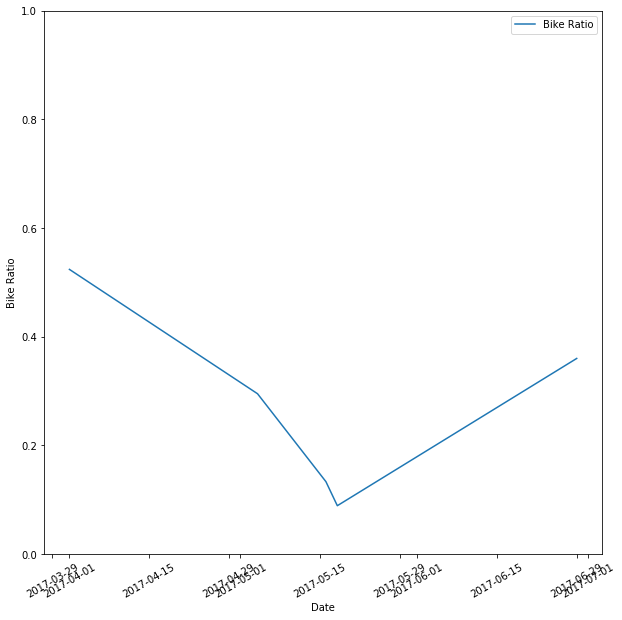

In [835]:
plt.figure(figsize=(10, 10))

plt.plot(mt['bike_ratio'], label='Bike Ratio')

plt.xticks(rotation = 30)
plt.xlabel('Date')
plt.ylabel('Bike Ratio')
plt.ylim(0, 1)

plt.legend()
plt.show()

# Duarte

In [836]:
merged_on_day_abs.loc['Arcadia']

,bike_count,ped_count,total,ped_percent,bike_percent,bike_ratio
date,,,,,,
2017-04-01,342,3960,4302,0.920502,0.079498,12.578947
2017-04-05,5,55,60,0.916667,0.083333,12.000000
2017-05-02,34,119,153,0.777778,0.222222,4.500000
2017-05-04,13,212,225,0.942222,0.057778,17.307692
2017-05-11,18,107,125,0.856000,0.144000,6.944444
2017-05-23,26,140,166,0.843373,0.156627,6.384615


In [837]:
# take out data with less than 100 bike_count data
arc = merged_on_day_avg.loc[['Arcadia']]
arc.index = arc.index.droplevel(0)
arc = arc.drop(arc.index[[1]])

arc

,bike_count,ped_count,total,ped_ratio,bike_ratio
date,,,,,
2017-04-01,3.800,44.0000,47.8000,0.920502,0.079498
2017-05-02,2.125,7.4375,9.5625,0.777778,0.222222
2017-05-04,1.625,26.5000,28.1250,0.942222,0.057778
2017-05-11,1.125,6.6875,7.8125,0.856000,0.144000
2017-05-23,1.625,8.7500,10.3750,0.843373,0.156627


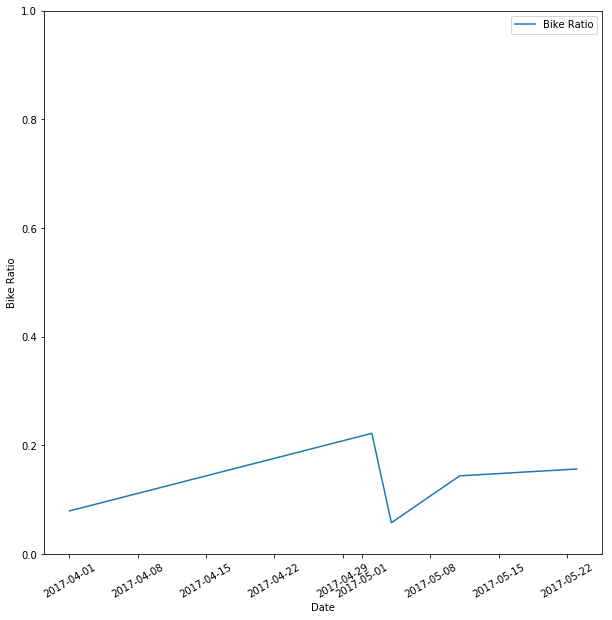

In [838]:
plt.figure(figsize=(10, 10))

plt.plot(arc['bike_ratio'], label='Bike Ratio')

plt.xticks(rotation = 30)
plt.xlabel('Date')
plt.ylabel('Bike Ratio')
plt.ylim(0, 1)

plt.legend()
plt.show()

# Duarte

In [839]:
merged_on_day_abs.loc['Duarte']

,bike_count,ped_count,total,ped_percent,bike_percent,bike_ratio
date,,,,,,
2017-01-24,20,161,181,0.889503,0.110497,9.050000
2017-01-26,17,90,107,0.841121,0.158879,6.294118
2017-01-28,4,112,116,0.965517,0.034483,29.000000
2017-01-31,1,21,22,0.954545,0.045455,22.000000
2017-02-02,13,71,84,0.845238,0.154762,6.461538
2017-04-01,94,2364,2458,0.961758,0.038242,26.148936
2017-04-04,35,319,354,0.901130,0.098870,10.114286
2017-04-11,32,135,167,0.808383,0.191617,5.218750
2017-04-13,14,80,94,0.851064,0.148936,6.714286


In [840]:
# remove data with 'total' less than 50
dua = merged_on_day_avg.loc[['Duarte']]
dua.index = dua.index.droplevel(0)
dua = dua.drop(dua.index[[3, 10, 11]])
dua


,bike_count,ped_count,total,ped_ratio,bike_ratio
date,,,,,
2017-01-24,1.25000,10.0625,11.31250,0.889503,0.110497
2017-01-26,2.12500,11.2500,13.37500,0.841121,0.158879
2017-01-28,0.50000,14.0000,14.50000,0.965517,0.034483
2017-02-02,0.81250,4.4375,5.25000,0.845238,0.154762
2017-04-01,1.46875,36.9375,38.40625,0.961758,0.038242
2017-04-04,2.18750,19.9375,22.12500,0.901130,0.098870
2017-04-11,2.00000,8.4375,10.43750,0.808383,0.191617
2017-04-13,0.87500,5.0000,5.87500,0.851064,0.148936
2017-04-18,2.37500,3.2500,5.62500,0.577778,0.422222


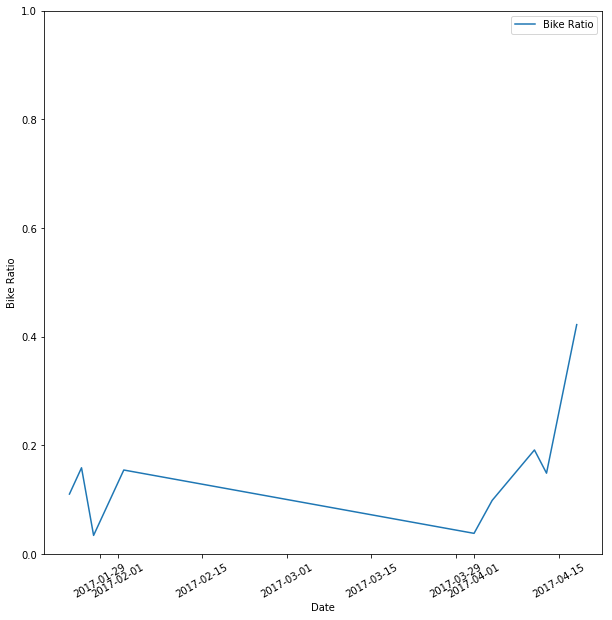

In [841]:
plt.figure(figsize=(10, 10))

plt.plot(dua['bike_ratio'], label='Bike Ratio')

plt.xticks(rotation = 30)
plt.xlabel('Date')
plt.ylabel('Bike Ratio')

plt.ylim(0, 1)
plt.legend()
plt.show()

# Arcadia

In [842]:
merged_on_day_abs.loc['Arcadia']

,bike_count,ped_count,total,ped_percent,bike_percent,bike_ratio
date,,,,,,
2017-04-01,342,3960,4302,0.920502,0.079498,12.578947
2017-04-05,5,55,60,0.916667,0.083333,12.000000
2017-05-02,34,119,153,0.777778,0.222222,4.500000
2017-05-04,13,212,225,0.942222,0.057778,17.307692
2017-05-11,18,107,125,0.856000,0.144000,6.944444
2017-05-23,26,140,166,0.843373,0.156627,6.384615


In [843]:
# remove data with 'total' less than 100
arc = merged_on_day_avg.loc[['Arcadia']]
arc.index = arc.index.droplevel(0)
arc = arc.drop(arc.index[[1]])
arc

,bike_count,ped_count,total,ped_ratio,bike_ratio
date,,,,,
2017-04-01,3.800,44.0000,47.8000,0.920502,0.079498
2017-05-02,2.125,7.4375,9.5625,0.777778,0.222222
2017-05-04,1.625,26.5000,28.1250,0.942222,0.057778
2017-05-11,1.125,6.6875,7.8125,0.856000,0.144000
2017-05-23,1.625,8.7500,10.3750,0.843373,0.156627


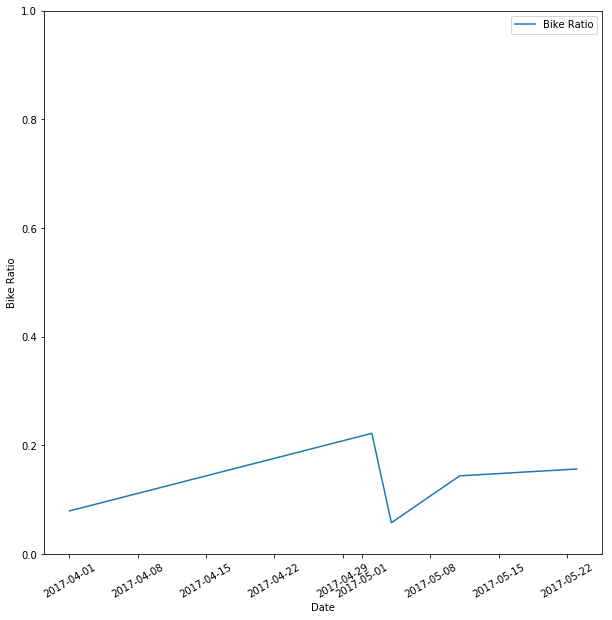

In [844]:
plt.figure(figsize=(10, 10))

plt.plot(arc['bike_ratio'], label='Bike Ratio')

plt.xticks(rotation = 30)
plt.xlabel('Date')
plt.ylabel('Bike Ratio')
plt.ylim(0, 1)
plt.legend()
plt.show()

# SEM

In [845]:
temp = merged_on_day_abs.loc['SEM']

total = temp['total']

for row in range(len(total)):
    if total[row] < 5:
        temp = temp.drop(temp.index[[row]])
        
temp

,bike_count,ped_count,total,ped_percent,bike_percent,bike_ratio
date,,,,,,
2016-12-03,199,820,1019,0.804711,0.195289,5.120603
2016-12-08,32,182,214,0.850467,0.149533,6.687500
2016-12-10,0,13,13,1.000000,0.000000,inf
2016-12-17,18,90,108,0.833333,0.166667,6.000000
2016-12-20,88,280,368,0.760870,0.239130,4.181818
2016-12-22,177,480,657,0.730594,0.269406,3.711864
2017-01-10,3,16,19,0.842105,0.157895,6.333333
2017-01-15,43,53,96,0.552083,0.447917,2.232558
2017-01-17,28,51,79,0.645570,0.354430,2.821429


In [846]:
# remove data with 'total' less than 75
sem = merged_on_day_avg.loc[['SEM']]
sem.index = sem.index.droplevel(0)
sem = sem.drop(sem.index[[2, 6, 9, 10]])
sem

,bike_count,ped_count,total,ped_ratio,bike_ratio
date,,,,,
2016-12-03,1.075676,4.432432,5.508108,0.804711,0.195289
2016-12-08,0.500000,2.843750,3.343750,0.850467,0.149533
2016-12-17,2.250000,11.250000,13.500000,0.833333,0.166667
2016-12-20,2.750000,8.750000,11.500000,0.760870,0.239130
2016-12-22,1.229167,3.333333,4.562500,0.730594,0.269406
2017-01-15,2.687500,3.312500,6.000000,0.552083,0.447917
2017-01-17,1.750000,3.187500,4.937500,0.645570,0.354430


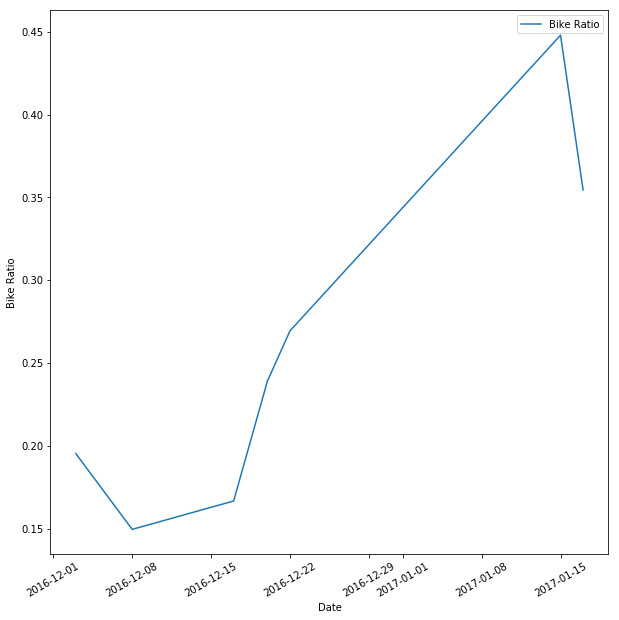

In [847]:
plt.figure(figsize=(10, 10))

plt.plot(sem['bike_ratio'], label='Bike Ratio')

plt.xticks(rotation = 30)
plt.xlabel('Date')
plt.ylabel('Bike Ratio')

plt.legend()
plt.show()

# El Monte

In [848]:
merged_on_day_abs.loc['El Monte']

,bike_count,ped_count,total,ped_percent,bike_percent,bike_ratio
date,,,,,,
2016-05-12,72,21,93,0.225806,0.774194,1.291667
2016-05-14,142,2,144,0.013889,0.986111,1.014085
2016-11-12,6,22,28,0.785714,0.214286,4.666667
2016-11-29,25,217,242,0.896694,0.103306,9.680000
2016-12-03,6,38,44,0.863636,0.136364,7.333333
2016-12-06,20,61,81,0.753086,0.246914,4.050000
2016-12-20,16,44,60,0.733333,0.266667,3.750000


In [849]:
# remove data with 'total' less than 50
em = merged_on_day_avg.loc[['El Monte']]
em.index = em.index.droplevel(0)
em = em.drop(em.index[[2, 4]])
em

,bike_count,ped_count,total,ped_ratio,bike_ratio
date,,,,,
2016-05-12,4.5000,1.3125,5.8125,0.225806,0.774194
2016-05-14,17.7500,0.2500,18.0000,0.013889,0.986111
2016-11-29,1.5625,13.5625,15.1250,0.896694,0.103306
2016-12-06,2.5000,7.6250,10.1250,0.753086,0.246914
2016-12-20,2.0000,5.5000,7.5000,0.733333,0.266667


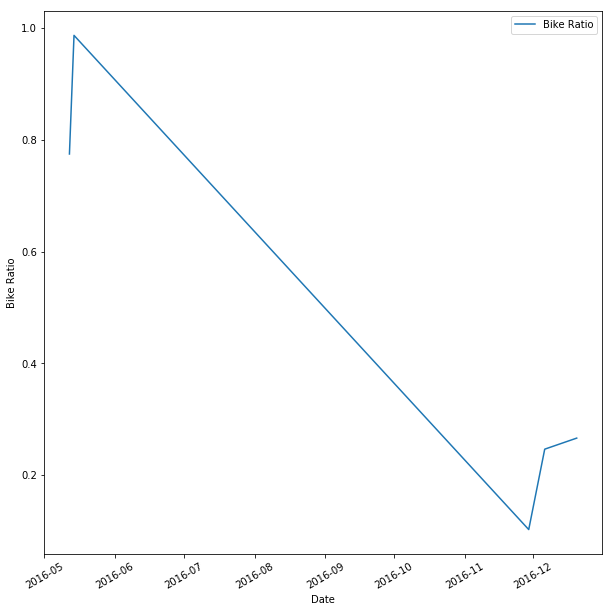

In [850]:
plt.figure(figsize=(10, 10))

plt.plot(em['bike_ratio'], label='Bike Ratio')

plt.xticks(rotation = 30)
plt.xlabel('Date')
plt.ylabel('Bike Ratio')

plt.legend()
plt.show()

# West Covina

In [851]:
merged_on_day_abs.loc['West Covina']

,bike_count,ped_count,total,ped_percent,bike_percent,bike_ratio
date,,,,,,
2016-04-26,23,152,175,0.868571,0.131429,7.608696
2016-05-10,56,300,356,0.842697,0.157303,6.357143
2016-05-12,3,18,21,0.857143,0.142857,7.000000
2016-05-14,13,31,44,0.704545,0.295455,3.384615
2016-05-28,30,82,112,0.732143,0.267857,3.733333
2017-04-01,9,19,28,0.678571,0.321429,3.111111


In [852]:
# remove data with 'total' less than 100
wc = merged_on_day_avg.loc[['West Covina']]
wc.index = wc.index.droplevel(0)
wc = wc.drop(wc.index[[2, 3, 5]])
wc

,bike_count,ped_count,total,ped_ratio,bike_ratio
date,,,,,
2016-04-26,1.4375,9.5000,10.9375,0.868571,0.131429
2016-05-10,0.8750,4.6875,5.5625,0.842697,0.157303
2016-05-28,0.9375,2.5625,3.5000,0.732143,0.267857


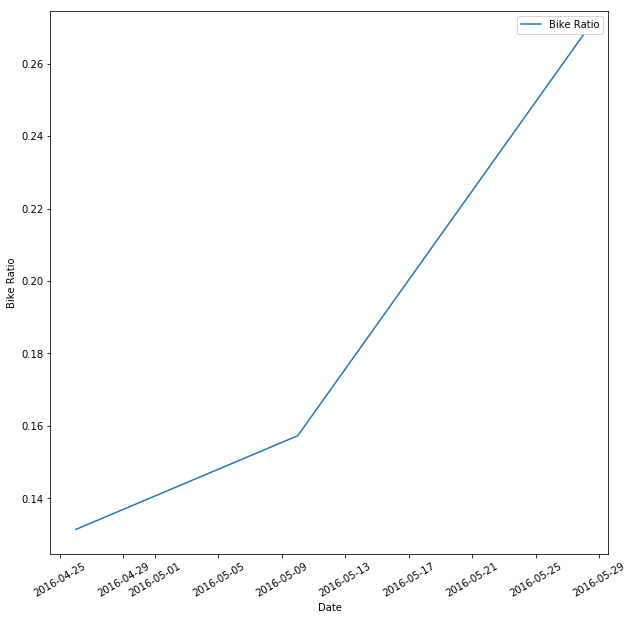

In [853]:
plt.figure(figsize=(10, 10))

plt.plot(wc['bike_ratio'], label='Bike Ratio')

plt.xticks(rotation = 30)
plt.xlabel('Date')
plt.ylabel('Bike Ratio')

plt.legend()
plt.show()

# Pasadena

In [854]:
merged_on_day_abs.loc['Pasadena']

,bike_count,ped_count,total,ped_percent,bike_percent,bike_ratio
date,,,,,,
2016-10-08,425,11295,11720,0.963737,0.036263,27.576471
2016-10-11,367,7205,7572,0.951532,0.048468,20.632153
2016-10-13,184,1273,1457,0.873713,0.126287,7.918478
2016-12-08,13,58,71,0.816901,0.183099,5.461538
2017-06-24,36,52,88,0.590909,0.409091,2.444444


In [855]:
# remove data with 'total' less than 100
pas = merged_on_day_avg.loc[['Pasadena']]
pas.index = pas.index.droplevel(0)
pas = pas.drop(pas.index[[3, 4]])
pas

,bike_count,ped_count,total,ped_ratio,bike_ratio
date,,,,,
2016-10-08,2.125000,56.475000,58.600000,0.963737,0.036263
2016-10-11,1.835000,36.025000,37.860000,0.951532,0.048468
2016-10-13,1.769231,12.240385,14.009615,0.873713,0.126287


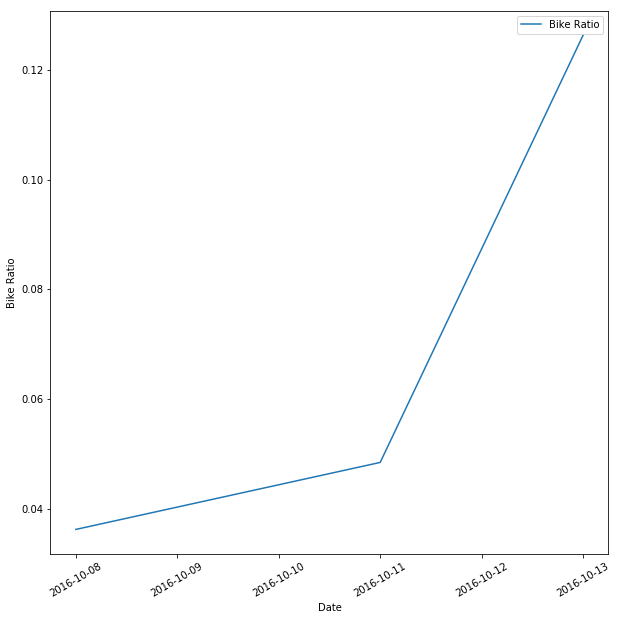

In [856]:
plt.figure(figsize=(10, 10))

plt.plot(pas['bike_ratio'], label='Bike Ratio')

plt.xticks(rotation = 30)
plt.xlabel('Date')
plt.ylabel('Bike Ratio')

plt.legend()
plt.show()

# La Verne

In [857]:
merged_on_day_abs.loc['La Verne']

,bike_count,ped_count,total,ped_percent,bike_percent,bike_ratio
date,,,,,,
2016-10-15,333,633,966,0.655280,0.344720,2.900901
2016-10-22,4,37,41,0.902439,0.097561,10.250000
2016-10-27,21,13,34,0.382353,0.617647,1.619048
2016-11-01,362,867,1229,0.705452,0.294548,3.395028
2016-11-08,14,70,84,0.833333,0.166667,6.000000
2017-03-14,31,12,43,0.279070,0.720930,1.387097
2017-03-16,9,4,13,0.307692,0.692308,1.444444
2017-04-01,20,20,40,0.500000,0.500000,2.000000
2017-06-29,30,25,55,0.454545,0.545455,1.833333


In [858]:
# remove data with 'total' less than 50
lv = merged_on_day_avg.loc[['La Verne']]
lv.index = lv.index.droplevel(0)
lv = lv.drop(lv.index[[1, 2, 5, 6, 7, 9]])
lv

,bike_count,ped_count,total,ped_ratio,bike_ratio
date,,,,,
2016-10-15,4.625000,8.791667,13.416667,0.655280,0.344720
2016-11-01,3.480769,8.336538,11.817308,0.705452,0.294548
2016-11-08,0.875000,4.375000,5.250000,0.833333,0.166667
2017-06-29,1.875000,1.562500,3.437500,0.454545,0.545455


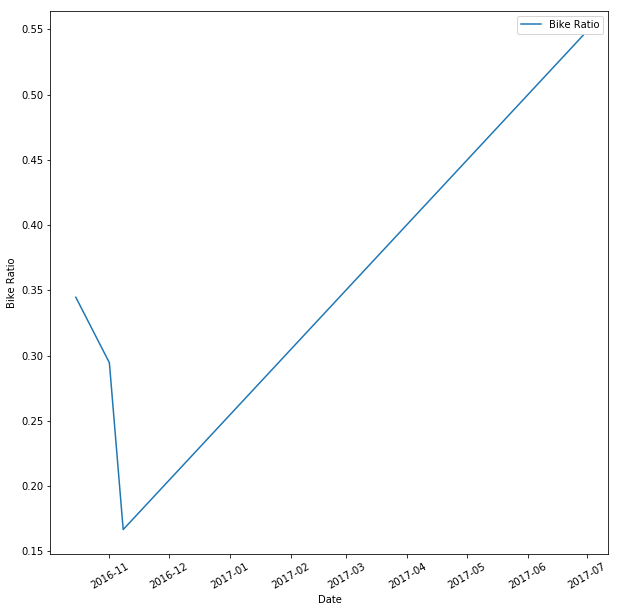

In [859]:
plt.figure(figsize=(10, 10))

plt.plot(lv['bike_ratio'], label='Bike Ratio')

plt.xticks(rotation = 30)
plt.xlabel('Date')
plt.ylabel('Bike Ratio')

plt.legend()
plt.show()

# Irwindale

In [860]:
merged_on_day_abs.loc['Irwindale']

,bike_count,ped_count,total,ped_percent,bike_percent,bike_ratio
date,,,,,,
2016-09-15,60,24,84,0.285714,0.714286,1.400000
2016-10-29,11,1,12,0.083333,0.916667,1.090909
2016-11-05,12,11,23,0.478261,0.521739,1.916667
2016-11-08,113,958,1071,0.894491,0.105509,9.477876
2016-12-03,112,650,762,0.853018,0.146982,6.803571
2016-12-06,25,111,136,0.816176,0.183824,5.440000
2017-04-06,18,85,103,0.825243,0.174757,5.722222


In [861]:
# remove data with 'total' less than 50
ir = merged_on_day_avg.loc[['Irwindale']]
ir.index = ir.index.droplevel(0)
ir = ir.drop(ir.index[[1, 2]])
ir

,bike_count,ped_count,total,ped_ratio,bike_ratio
date,,,,,
2016-09-15,0.9375,0.3750,1.3125,0.285714,0.714286
2016-11-08,2.8250,23.9500,26.7750,0.894491,0.105509
2016-12-03,3.5000,20.3125,23.8125,0.853018,0.146982
2016-12-06,3.1250,13.8750,17.0000,0.816176,0.183824
2017-04-06,1.1250,5.3125,6.4375,0.825243,0.174757


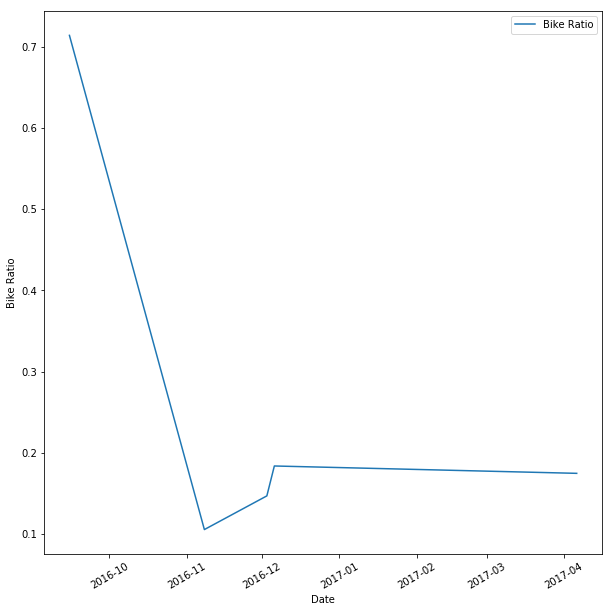

In [862]:
plt.figure(figsize=(10, 10))

plt.plot(ir['bike_ratio'], label='Bike Ratio')

plt.xticks(rotation = 30)
plt.xlabel('Date')
plt.ylabel('Bike Ratio')

plt.legend()
plt.show()

# La Puente

In [863]:
merged_on_day_abs.loc['La Puente']

,bike_count,ped_count,total,ped_percent,bike_percent,bike_ratio
date,,,,,,
2017-02-07,13,41,54,0.759259,0.240741,4.153846
2017-02-14,38,61,99,0.616162,0.383838,2.605263
2017-03-21,9,80,89,0.898876,0.101124,9.888889
2017-04-29,2,7,9,0.777778,0.222222,4.500000
2017-06-17,75,181,256,0.707031,0.292969,3.413333


In [864]:
# remove data with 'total' less than 50
lp = merged_on_day_avg.loc[['La Puente']]
lp.index = lp.index.droplevel(0)
lp = lp.drop(lp.index[[3]])
lp

,bike_count,ped_count,total,ped_ratio,bike_ratio
date,,,,,
2017-02-07,0.812500,2.562500,3.375000,0.759259,0.240741
2017-02-14,2.375000,3.812500,6.187500,0.616162,0.383838
2017-03-21,0.562500,5.000000,5.562500,0.898876,0.101124
2017-06-17,1.086957,2.623188,3.710145,0.707031,0.292969


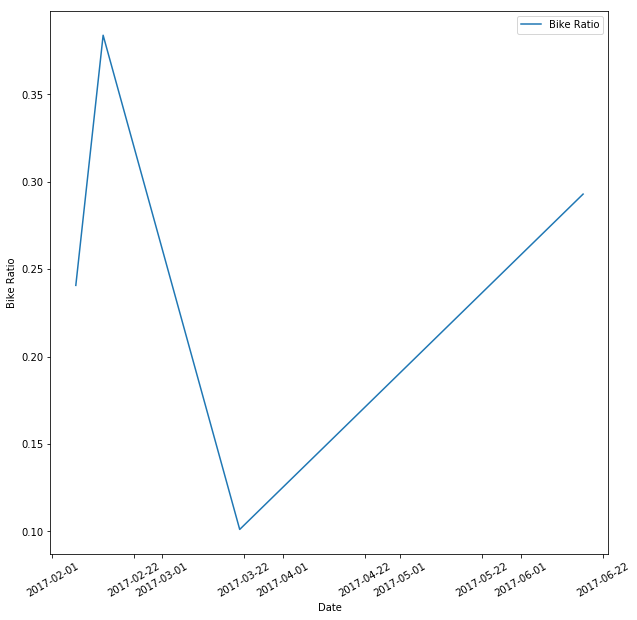

In [865]:
plt.figure(figsize=(10, 10))

plt.plot(lp['bike_ratio'], label='Bike Ratio')

plt.xticks(rotation = 30)
plt.xlabel('Date')
plt.ylabel('Bike Ratio')

plt.legend()
plt.show()

# Rowland Heights

In [866]:
temp = merged_on_day_abs.loc['Rowland Heights']

total = temp['total']

total

for row in range(len(total)):
    if total[row] < 5:
        temp.index = temp.index.droplevel(row)
   
temp

,bike_count,ped_count,total,ped_percent,bike_percent,bike_ratio
date,,,,,,
2017-03-28,21,75,96,0.781250,0.218750,4.571429
2017-04-01,3,6,9,0.666667,0.333333,3.000000
2017-05-21,6,39,45,0.866667,0.133333,7.500000
2017-06-01,5,12,17,0.705882,0.294118,3.400000
2017-06-08,19,66,85,0.776471,0.223529,4.473684
2017-06-10,31,217,248,0.875000,0.125000,8.000000
2017-06-13,33,121,154,0.785714,0.214286,4.666667
2017-07-08,3,39,42,0.928571,0.071429,14.000000


In [867]:
# remove data with 'total' less than 50
rh = merged_on_day_avg.loc[['Rowland Heights']]
rh.index = rh.index.droplevel(0)
rh = rh.drop(rh.index[[1, 2, 3, 7]])
rh

,bike_count,ped_count,total,ped_ratio,bike_ratio
date,,,,,
2017-03-28,1.3125,4.6875,6.0000,0.781250,0.218750
2017-06-08,1.1875,4.1250,5.3125,0.776471,0.223529
2017-06-10,1.9375,13.5625,15.5000,0.875000,0.125000
2017-06-13,2.0625,7.5625,9.6250,0.785714,0.214286


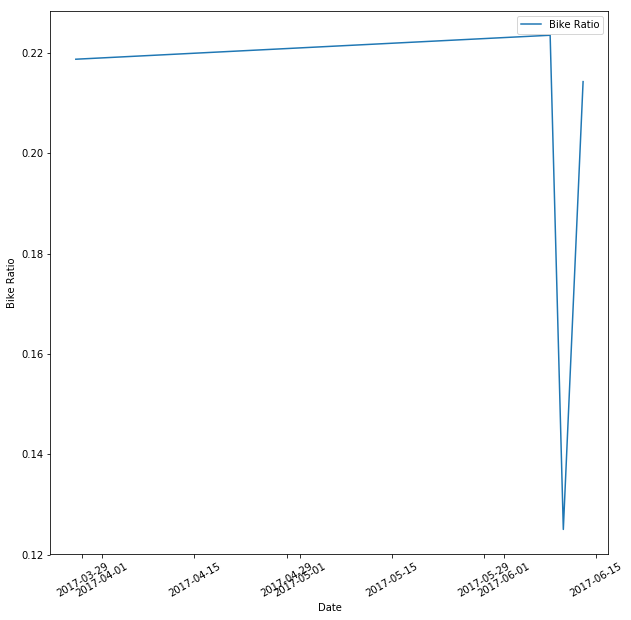

In [868]:
plt.figure(figsize=(10, 10))

plt.plot(rh['bike_ratio'], label='Bike Ratio')

plt.xticks(rotation = 30)
plt.xlabel('Date')
plt.ylabel('Bike Ratio')

plt.legend()
plt.show()

# Claremont

In [869]:
merged_on_day_abs.loc['Claremont']

,bike_count,ped_count,total,ped_percent,bike_percent,bike_ratio
date,,,,,,
2017-06-13,32,36,68,0.529412,0.470588,2.125000
2017-06-20,12,8,20,0.400000,0.600000,1.666667
2017-06-24,15,8,23,0.347826,0.652174,1.533333
2017-07-01,16,17,33,0.515152,0.484848,2.062500
2017-07-06,5,20,25,0.800000,0.200000,5.000000


In [870]:
# remove data with 'total' less than 20
cla = merged_on_day_avg.loc[['Claremont']]
cla.index = cla.index.droplevel(0)
cla

,bike_count,ped_count,total,ped_ratio,bike_ratio
date,,,,,
2017-06-13,2.000,2.250,4.250,0.529412,0.470588
2017-06-20,1.500,1.000,2.500,0.400000,0.600000
2017-06-24,1.875,1.000,2.875,0.347826,0.652174
2017-07-01,2.000,2.125,4.125,0.515152,0.484848
2017-07-06,0.625,2.500,3.125,0.800000,0.200000


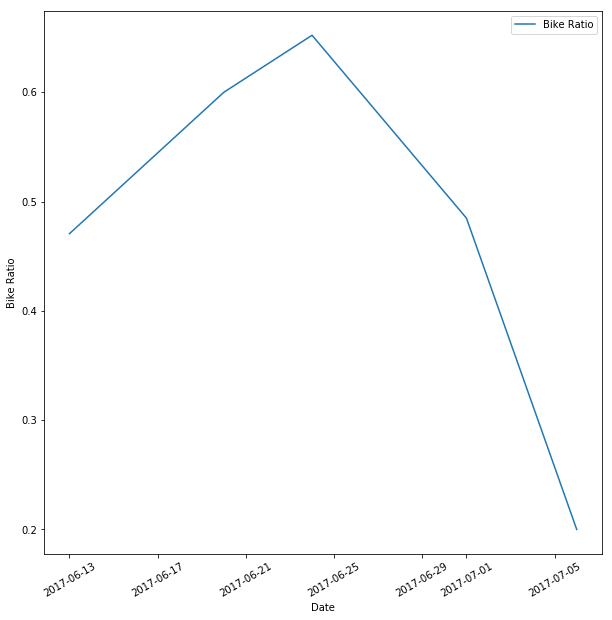

In [888]:
plt.figure(figsize=(10, 10))

plt.plot(cla['bike_ratio'], label='Bike Ratio')

plt.xticks(rotation = 30)
plt.xlabel('Date')
plt.ylabel('Bike Ratio')

plt.legend()
plt.show()

# Covina

In [872]:
temp = merged_on_day_abs.loc['Covina']

total = temp['total']

for row in range(len(total)):
    if total[row] < 5:
        temp = temp.drop(temp.index[[row]])
temp

,bike_count,ped_count,total,ped_percent,bike_percent,bike_ratio
date,,,,,,
2016-04-21,15,126,141,0.893617,0.106383,9.400000
2016-04-23,5,25,30,0.833333,0.166667,6.000000
2016-05-03,3,11,14,0.785714,0.214286,4.666667
2016-05-24,0,5,5,1.000000,0.000000,inf
2016-05-28,13,14,27,0.518519,0.481481,2.076923
2017-01-31,31,573,604,0.948675,0.051325,19.483871
2017-02-09,10,90,100,0.900000,0.100000,10.000000
2017-02-14,18,69,87,0.793103,0.206897,4.833333


In [873]:
# remove data with 'total' less than 50
co = merged_on_day_avg.loc[['Covina']]
co.index = co.index.droplevel(0)
co = co.drop(co.index[[1, 2, 3, 4, -1]])
co

,bike_count,ped_count,total,ped_ratio,bike_ratio
date,,,,,
2016-04-21,0.937500,7.8750,8.812500,0.893617,0.106383
2017-01-31,1.291667,23.8750,25.166667,0.948675,0.051325
2017-02-09,0.416667,3.7500,4.166667,0.900000,0.100000
2017-02-14,1.125000,4.3125,5.437500,0.793103,0.206897


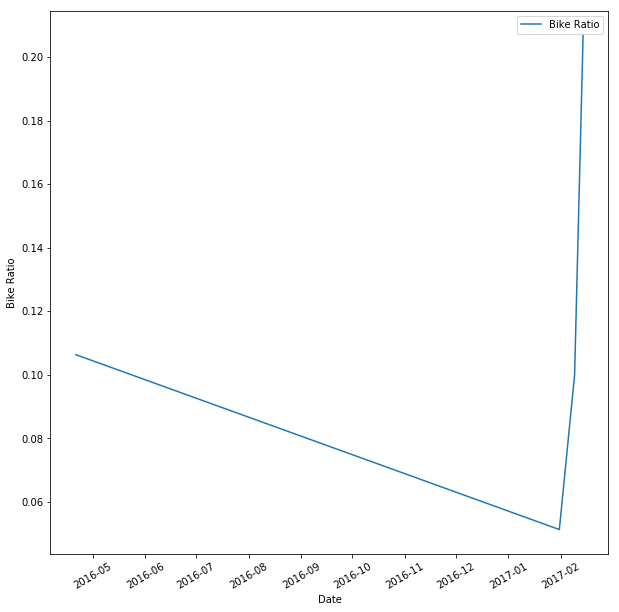

In [887]:
plt.figure(figsize=(10, 10))

plt.plot(co['bike_ratio'], label='Bike Ratio')

plt.xticks(rotation = 30)
plt.xlabel('Date')
plt.ylabel('Bike Ratio')

plt.legend()
plt.show()

In [875]:
merged_on_day_abs.loc['Temple City']

,bike_count,ped_count,total,ped_percent,bike_percent,bike_ratio
date,,,,,,
2017-03-23,36,220,256,0.859375,0.140625,7.111111
2017-03-25,13,68,81,0.839506,0.160494,6.230769
2017-04-01,68,140,208,0.673077,0.326923,3.058824
2017-04-18,39,140,179,0.782123,0.217877,4.589744
2017-06-01,30,71,101,0.702970,0.297030,3.366667


In [876]:
# remove data with 'total' less than 100
tc = merged_on_day_avg.loc[['Temple City']]
tc.index = tc.index.droplevel(0)
tc = tc.drop(tc.index[[1]])
tc

,bike_count,ped_count,total,ped_ratio,bike_ratio
date,,,,,
2017-03-23,2.2500,13.7500,16.0000,0.859375,0.140625
2017-04-01,2.1250,4.3750,6.5000,0.673077,0.326923
2017-04-18,2.4375,8.7500,11.1875,0.782123,0.217877
2017-06-01,1.8750,4.4375,6.3125,0.702970,0.297030


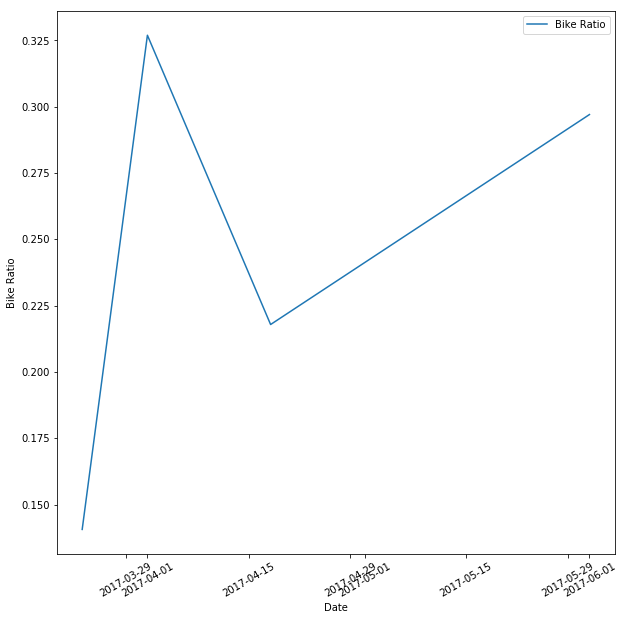

In [877]:
plt.figure(figsize=(10, 10))

plt.plot(tc['bike_ratio'], label='Bike Ratio')

plt.xticks(rotation = 30)
plt.xlabel('Date')
plt.ylabel('Bike Ratio')

plt.legend()
plt.show()

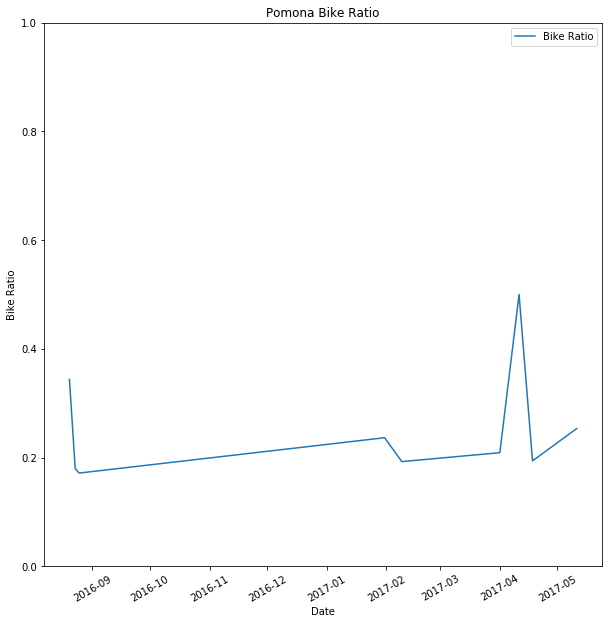

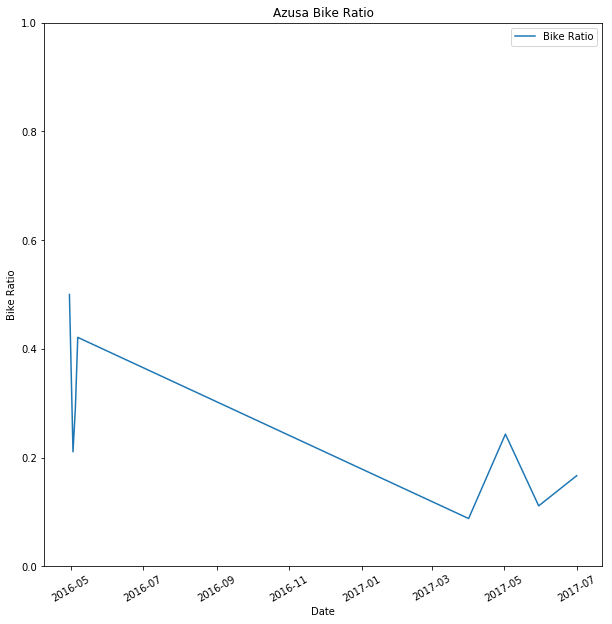

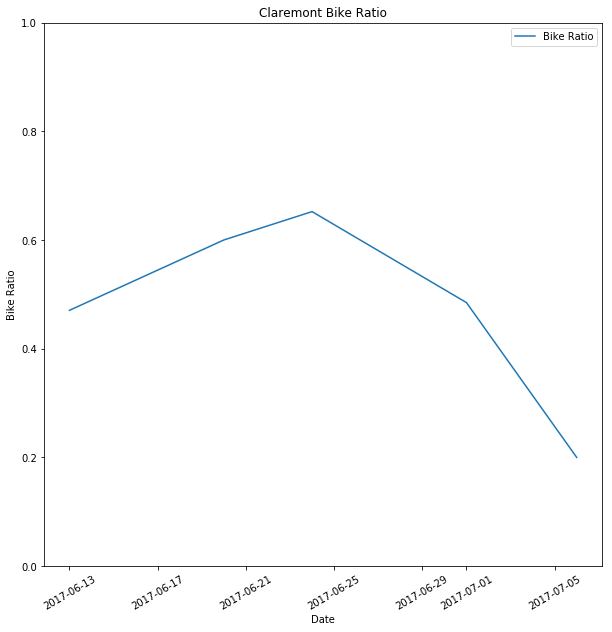

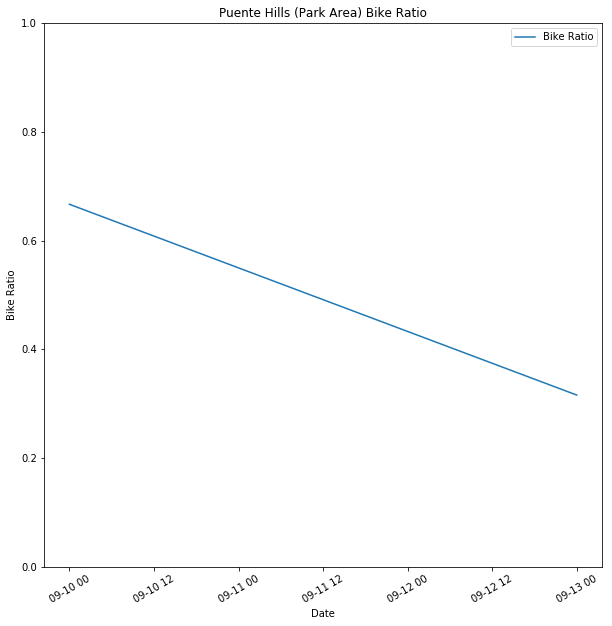

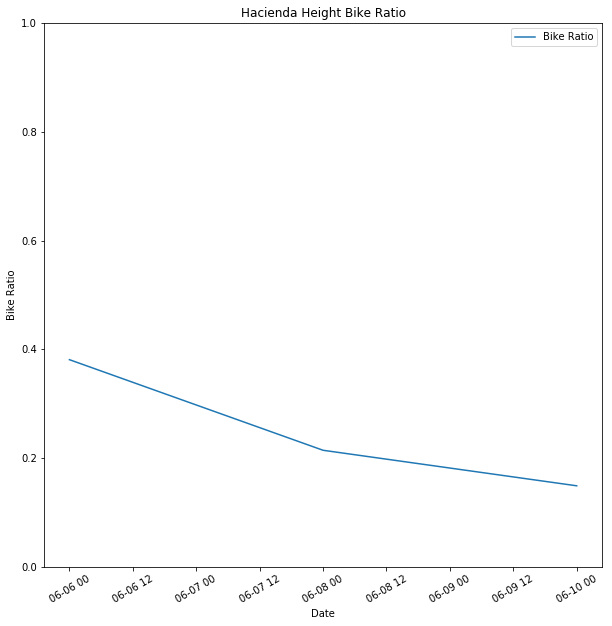

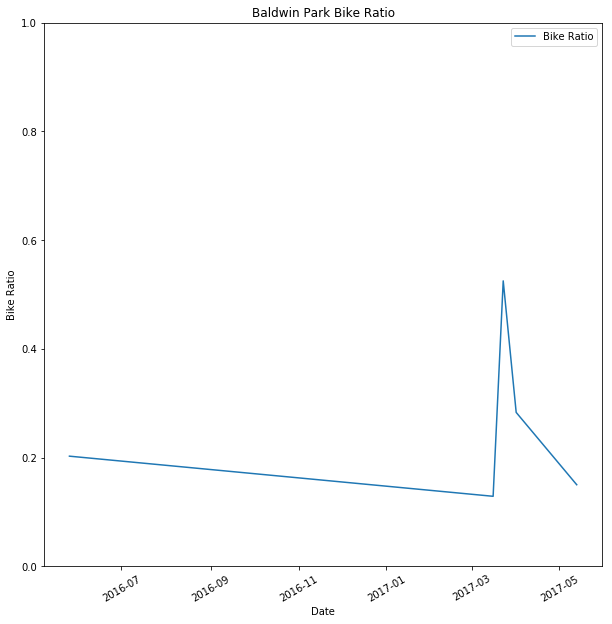

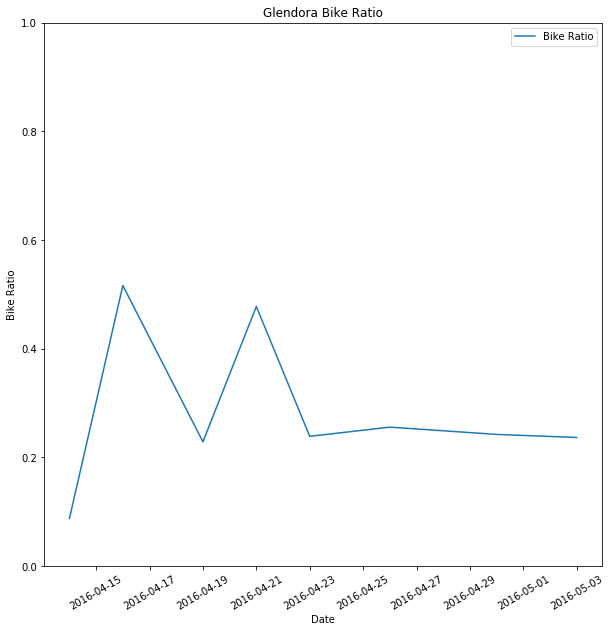

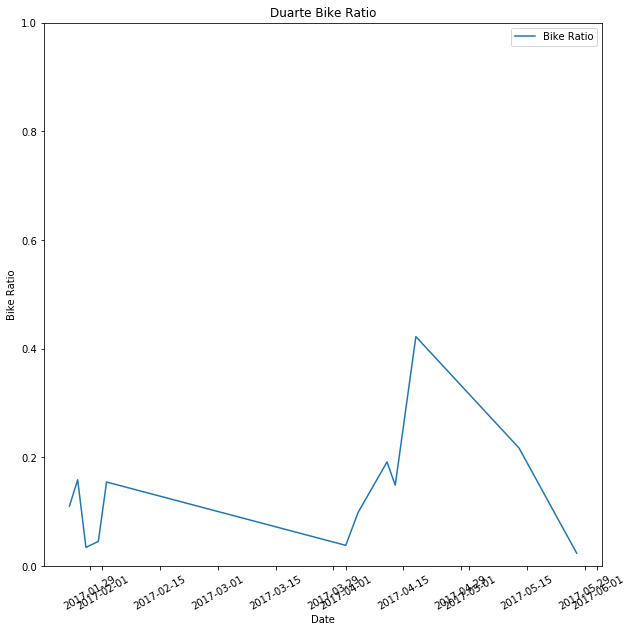

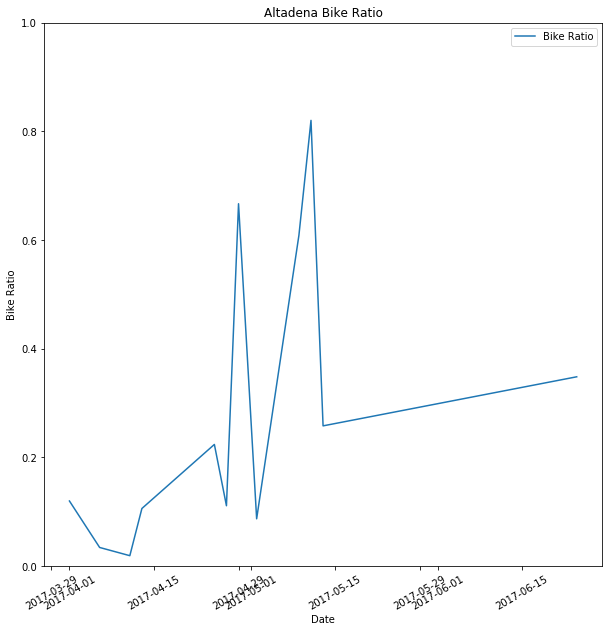

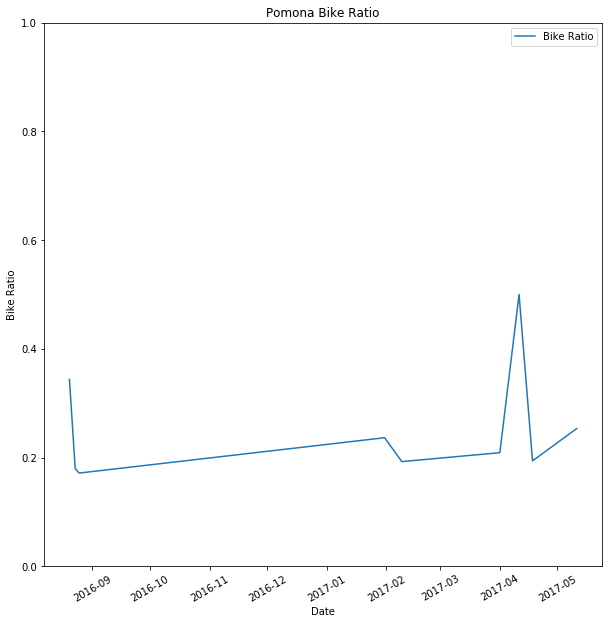

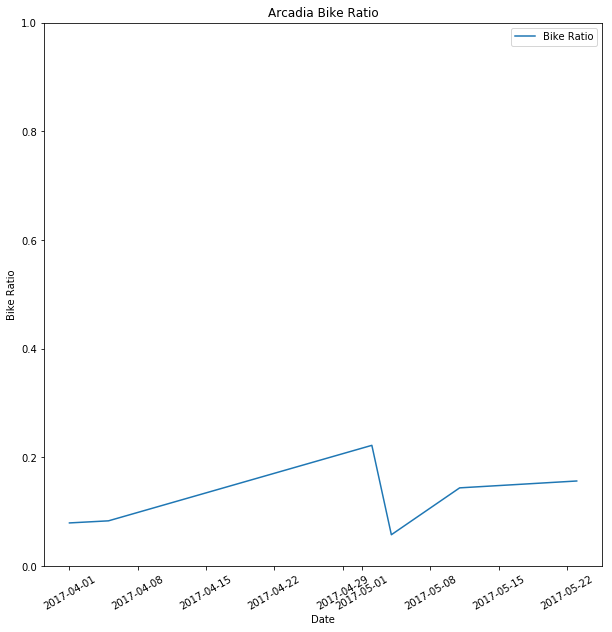

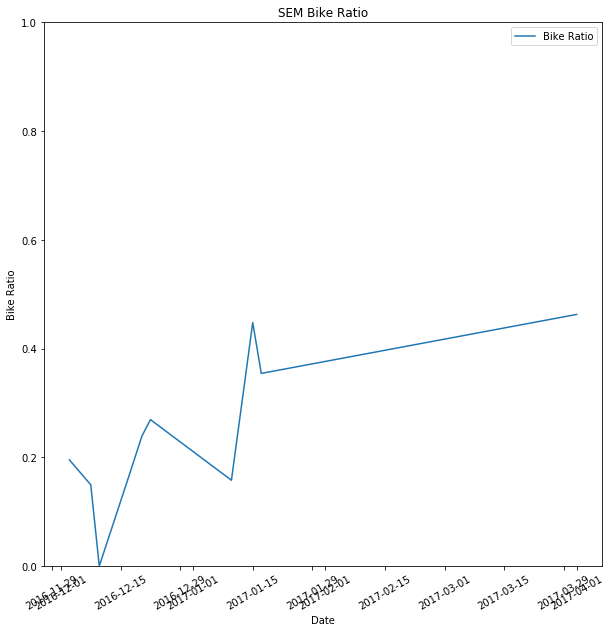

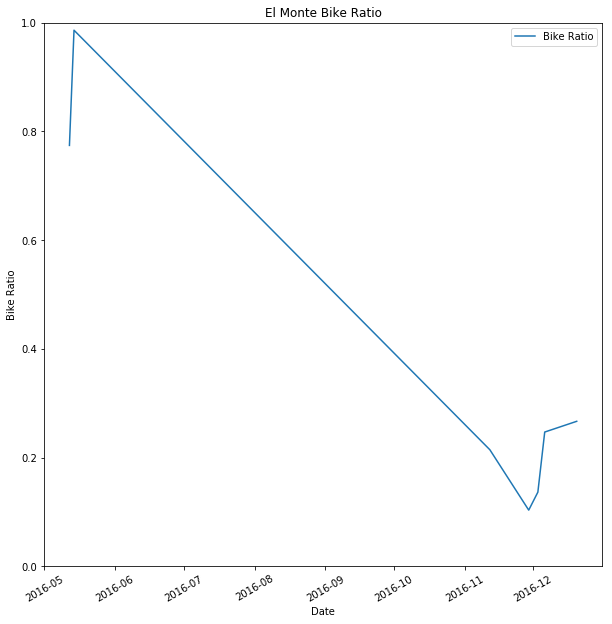

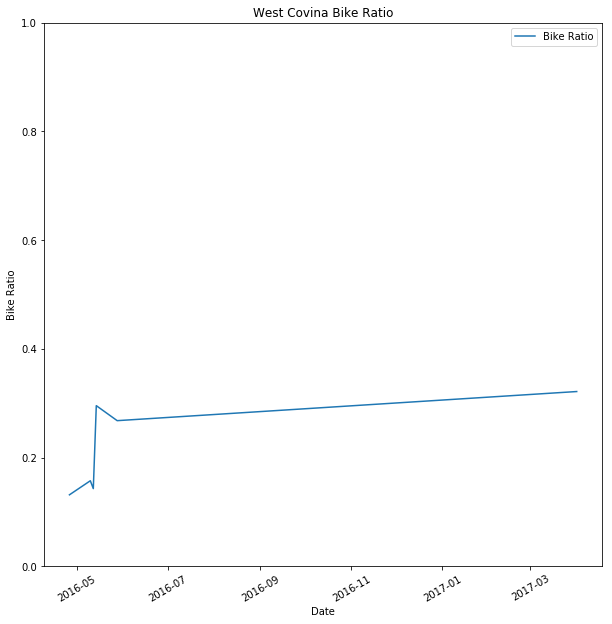

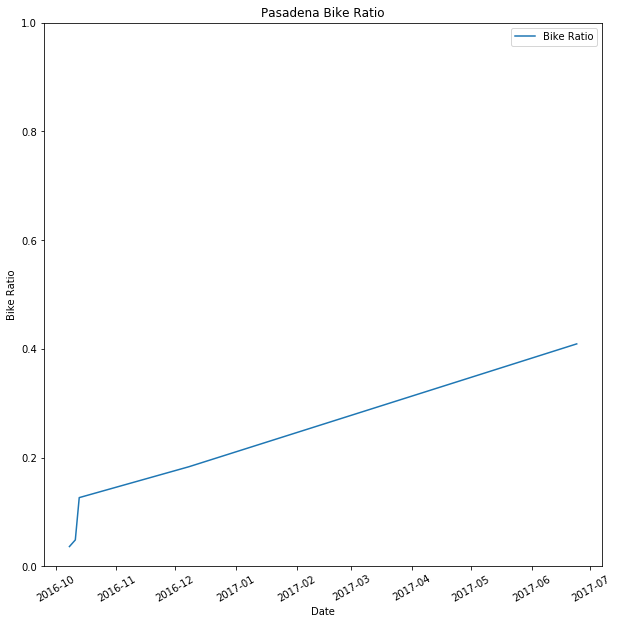

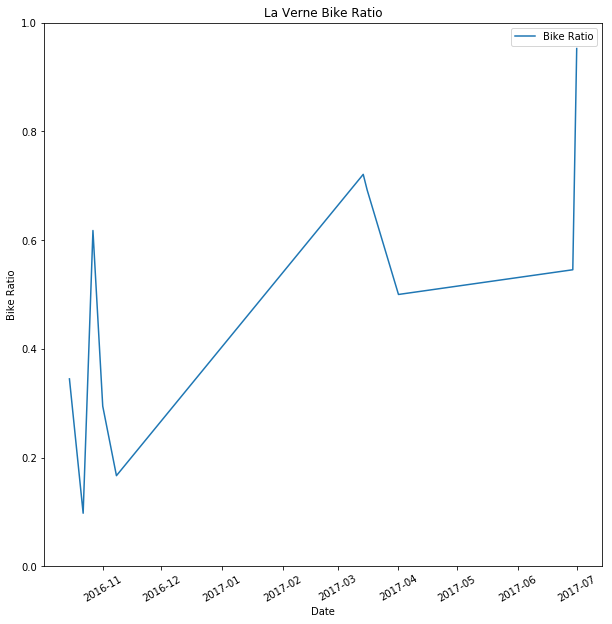

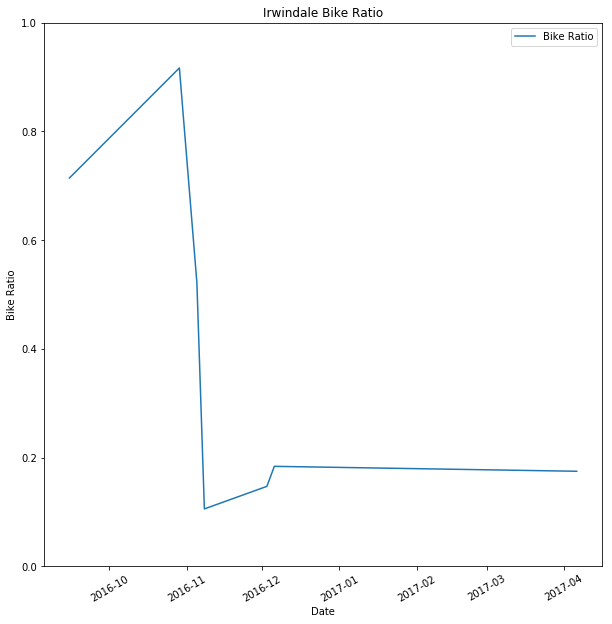

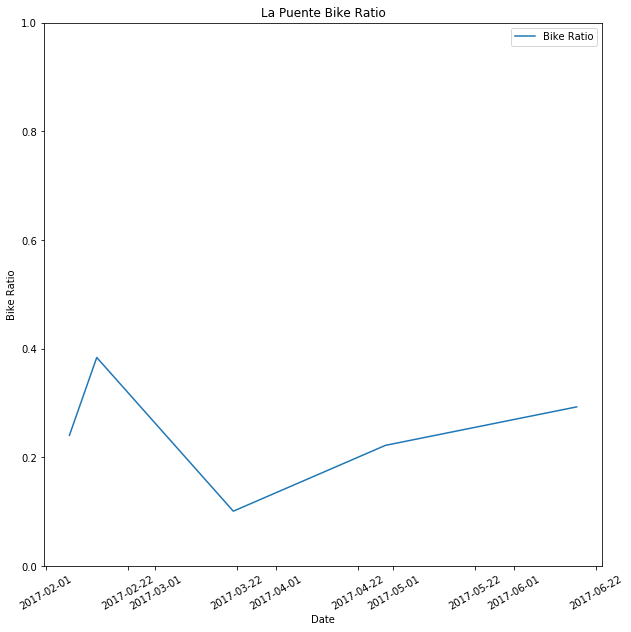

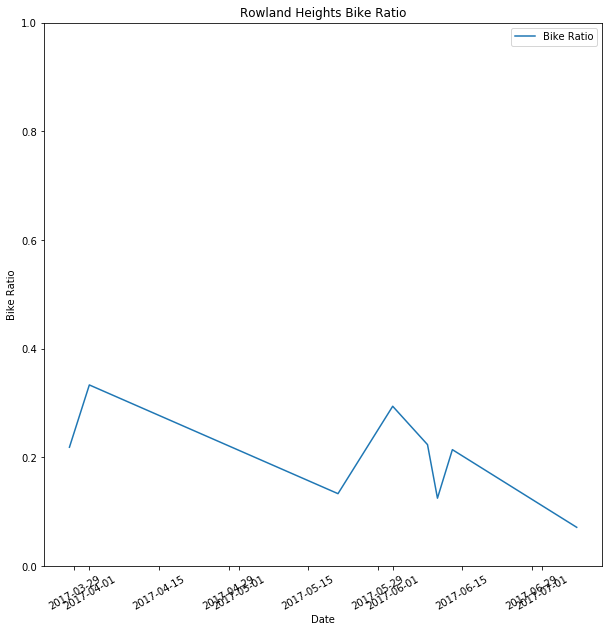

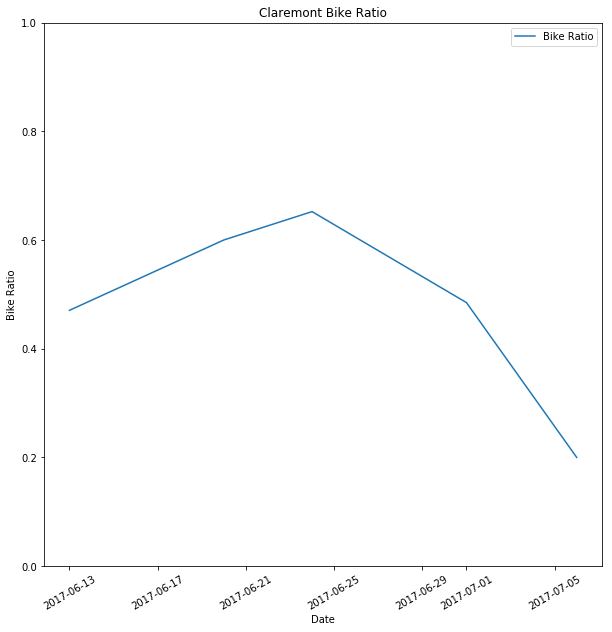

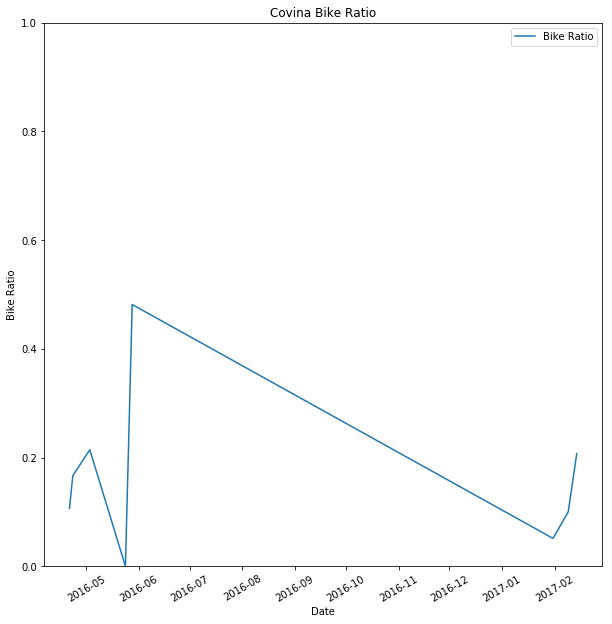

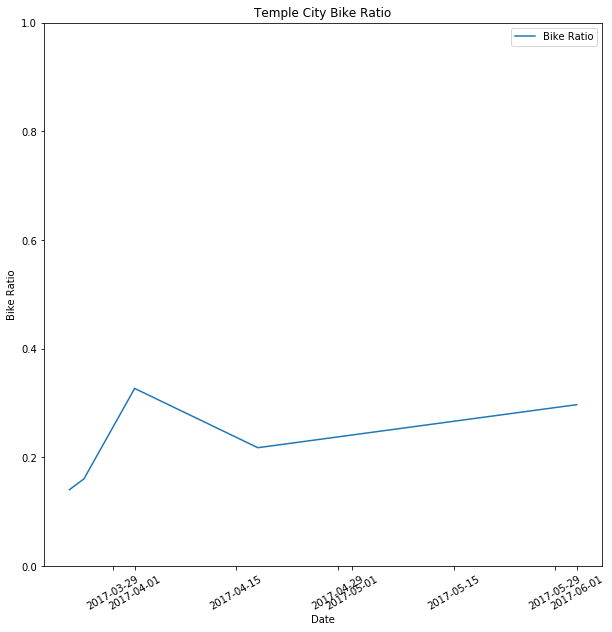

In [891]:
output_path = '<03l-starter-code-for-temporal-trends in BikeSGV>'
cities = ['Pomona', 'Azusa', 'Claremont', 'Puente Hills (Park Area)', 'Hacienda Height', 'Baldwin Park', 'Glendora', 'Duarte', 'Altadena', 'Pomona', 'Arcadia', 'SEM', 'El Monte', 'West Covina', 'Pasadena', 'La Verne', 'Irwindale', 'La Puente', 'Rowland Heights', 'Claremont', 'Covina', 'Temple City']
for city in cities:
	temp = merged_on_day_avg.loc[[city]]
	temp.index = temp.index.droplevel(0)
    
	# drop values less than 5 in 'total'
	data = merged_on_day_abs.loc[city]
	data_total = data['total']
	for row in range(len(data_total)):
		if data_total[row] < 5:
			temp = temp.drop(temp.index[[row]])
	plt.figure(figsize=(10, 10))
	plt.plot(temp['bike_ratio'], label='Bike Ratio')
	plt.xticks(rotation = 30)
	plt.xlabel('Date')
	plt.ylabel('Bike Ratio')
	plt.title(city + ' Bike Ratio')
	plt.ylim(0, 1)
	plt.legend()

	# This can save the plot on the fly, and the inclusion of the city name prevent the plot be overwritten
	plt.savefig(output_path + city + '_plpt')
	plt.show()